In [1]:
import numpy as np
from numpy import exp, sqrt, abs
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
plt.rcParams['font.size'] = 14

In [2]:
CASE=0
if CASE==0: dname="DATA"
if CASE==1: dname="DATA_b"

fname=dname+'/x_RBM_q0.1.dat'
# loading data: each row is a list of visible units
# NOTE: data "x" here is named "v" for "visible"
v = np.loadtxt(fname, delimiter=" ",dtype=int)
# store in v0, because later we will shuffle v
v0 = np.copy(v)
# to start, take a small subsample
# v = v[1:11]
N = len(v)
L = len(v[1])

SPINS = True
#SPINS = False

if SPINS:
    # sigmoid takes into account energy difference =2
    GAP=2
    # convert 0,1 -> -1,1
    v = 2*v - 1
    vmin=-1
else:
    GAP=1
    vmin=0

print(f'each of N={N} data has L={L} digits')

for i in range(min(12,N)):
    if SPINS: print(v0[i],"\n->",v[i])
    else: print(v[i])
print('...')

each of N=10000 data has L=30 digits
[0 0 1 1 1 1 1 0 1 1 0 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0 1 1 1 1] 
-> [-1 -1  1  1  1  1  1 -1  1  1 -1 -1 -1 -1  1 -1  1  1  1  1  1  1 -1 -1
 -1 -1  1  1  1  1]
[1 1 0 1 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 0 0] 
-> [ 1  1 -1  1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1 -1 -1 -1 -1  1  1  1  1
  1  1  1  1 -1 -1]
[0 0 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 1 0 0 1 1 1 1] 
-> [-1 -1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1  1  1  1  1  1 -1 -1 -1 -1  1
 -1 -1  1  1  1  1]
[0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 1 1 0 1 1 1 0 0 0 0 0 1 1 1] 
-> [-1 -1  1 -1  1  1  1 -1  1  1 -1 -1 -1 -1  1  1  1  1 -1  1  1  1 -1 -1
 -1 -1 -1  1  1  1]
[1 1 1 1 0 0 0 0 1 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 1 1 1 1 0 0] 
-> [ 1  1  1  1 -1 -1 -1 -1  1  1  1  1 -1  1 -1  1 -1 -1  1 -1  1  1  1  1
  1  1  1  1 -1 -1]
[0 1 1 1 0 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0] 
-> [-1  1  1  1 -1  1  1  1  1  1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1
 -1 -1  1  1  1 -1]
[1 0 1 1 

## initialize

In [3]:
# RBM, nr of hidden units
if CASE==0: M = 3
if CASE==1: M = 6
# range of each initial weight
sigma = sqrt(4. / float(L + M))
# random seed for reproducibility
np.random.seed(12345)
# initial weights from a Normal distr. (see literature, e.g. page 98 of Mehta's review)
w = sigma * np.random.randn(L,M)
a = sigma * np.random.randn(L)
b = np.zeros(M)
print("w=",w);print("a=",a);print("b=",b)
w0,a0,b0=np.copy(w),np.copy(a),np.copy(b)

w= [[-7.12700590e-02  1.66746667e-01 -1.80845348e-01]
 [-1.93480457e-01  6.84396948e-01  4.85121642e-01]
 [ 3.23463708e-02  9.80914197e-02  2.67739292e-01]
 [ 4.33952874e-01  3.50658325e-01 -4.51286265e-01]
 [ 9.57397979e-02  7.96972348e-02  4.71025183e-01]
 [ 3.08615084e-01 -6.96880662e-01 -1.29458954e-01]
 [ 5.81080027e-01 -1.52690383e-01 -1.87913851e-01]
 [ 1.66064865e-01  1.13113708e+00 -3.55545787e-01]
 [-2.00916010e-01  4.32134814e-02  1.05356519e-01]
 [ 1.82354028e-01  3.27362702e-04  4.67854518e-01]
 [-2.48424129e-01 -2.89370520e-01 -8.25208741e-01]
 [-6.47833753e-01 -2.99677261e-01  1.95017559e-01]
 [-4.40741818e-01  4.17184500e-02 -3.70267508e-01]
 [ 1.15894886e-01 -8.21444191e-01 -6.94719399e-02]
 [-5.36853934e-01 -3.37966864e-01 -4.55049525e-01]
 [ 9.96941855e-02  1.31597176e-01 -2.62469602e-01]
 [ 1.15338859e-01  4.69919922e-01  2.43279404e-02]
 [ 8.58809017e-02 -4.12967942e-03  3.49830493e-01]
 [ 4.62069855e-01 -3.20045794e-01 -5.39329635e-01]
 [ 7.72368587e-03  2.6402815

## Plotting

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1]


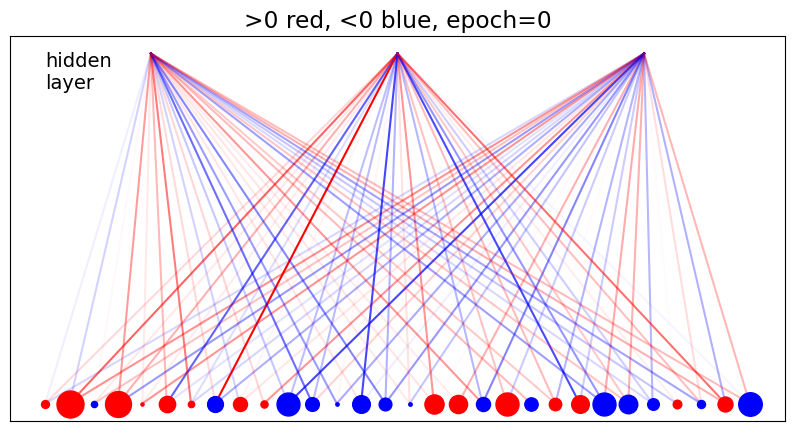

In [4]:
def create_coord(np,x0,f=1.0):
    x=[x0] * np
    print(x)
    y=list(range(np))
    for i in range(np):
        y[i] = f*(y[i]/(np-1.) - 0.5)
    return (x,y)
(x1,y1)=create_coord(L,0)
(x2,y2)=create_coord(M,1,f=0.7)

def mycolor(val):
    if val>0: return 'red'
    elif val<0: return 'blue'
    else: return 'black'

def plotgraph_vert(epoch=0):
    A=2./w.max()
    for i in range(L):
        for j in range(M):
            ex, ey, col = (x1[i],x2[j]),(y1[i],y2[j]),mycolor(w[i][j])
            plt.plot(ex, ey, col, zorder=1, lw=A*abs(w[i][j]))
    # Scatter plot on top of lines
    
    A=300./(a.max()+b.max())
    
    for i in range(L):
        plt.scatter(x1[i], y1[i], s=A*abs(a[i]), zorder=2, c=mycolor(a[i]))

    for j in range(M):
        plt.scatter(x2[j], y2[j], s=A*abs(b[j]), zorder=2, c=mycolor(b[j]), marker="s")
    plt.figaspect(1)
    plt.title(f'>0 red, <0 blue, epoch={epoch}')
    plt.show()
    
def plotgraph(epoch=0):
    fig, ax = plt.subplots(1,1 , figsize=(10, 5))
    ax.tick_params(left=False,bottom=False)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    
    A=1./max(w.max(),-w.min())
    for i in range(L):
        for j in range(M):
            ex, ey, col = (y1[i],y2[j]),(x1[i],x2[j]),mycolor(w[i][j])
            ax.plot(ex, ey, col, zorder=1, alpha=A*abs(w[i][j]))
    # Scatter plot on top of lines
    #A=300./(a.max()+b.max())
    A=500.
    for i in range(L):
        ax.scatter(y1[i],x1[i], s=A*abs(a[i]), zorder=2, c=mycolor(a[i]))
    for j in range(M):
        ax.scatter(y2[j], x2[j], s=min(300,A*abs(b[j])), zorder=2, c=mycolor(b[j]), marker="s")
    ax.set_title(f'>0 red, <0 blue, epoch={epoch}')
    ax.text(-0.5,0.9,"hidden\nlayer")
    plt.show()
                  
plotgraph()

In [5]:
# eq(213) page 97, activation via sigmoid
# taking into account energy gap DE=2 for "spin" variables (-1,1)
def activate(v_in,wei,bias,DE,info=False):
    act = np.dot(v_in, wei) + bias
    n = np.shape(act)
    prob = 1. / (1. + exp(-DE*act))
    v_out = np.full(n, vmin, dtype=int) # a list on -1's or 0's
    v_out[np.random.random_sample(n) < prob] = 1 # activate the 1's with probability prob
    if info:
        print('input=', v_in)
        print('act=',act)
        print('prob=',prob)
        print('output=',v_out)
    return v_out

k = 0
activate(v[k],w,b,GAP,info=True)

input= [-1 -1  1  1  1  1  1 -1  1  1 -1 -1 -1 -1  1 -1  1  1  1  1  1  1 -1 -1
 -1 -1  1  1  1  1]
act= [3.6687593  1.53667018 0.72566258]
prob= [0.99934976 0.95577957 0.81020229]
output= [ 1  1 -1]


array([ 1,  1, -1])

## RBM train


TAST 4

In [8]:
# Define some helper functions
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def sample_bernoulli(p):
  return np.random.binomial(1, p)

def rbm_energy(v, h, W, a, b):
  return -np.dot(v.T, a) - np.dot(h.T, b) - np.dot(np.dot(v.T, W), h)

# Define RBM parameters
n_visible = 6 # number of visible units
n_hidden = 2 # number of hidden units
n_samples = 1000 # number of data samples
n_epochs = 10 # number of training epochs
k = 1 # number of Gibbs steps for CD-k
lr = 0.01 # learning rate

# Initialize RBM weights and biases randomly
W = np.random.randn(n_visible, n_hidden) * 0.01 # weight matrix
a = np.random.randn(n_visible) * 0.01 # visible bias vector
b = np.random.randn(n_hidden) * 0.01 # hidden bias vector

# Generate some synthetic data samples from a Bernoulli distribution
v_data = sample_bernoulli(0.5 * np.ones((n_samples, n_visible)))

# Train RBM using CD-k algorithm
for epoch in range(n_epochs):
  print(f"Epoch {epoch+1}")
  
  # Shuffle the data samples
  np.random.shuffle(v_data)
  
  # Loop over each data sample
  for v in v_data:
    
    # Positive phase: compute hidden activations and sample h given v 
    p_h_given_v = sigmoid(np.dot(v, W) + b)
    h = sample_bernoulli(p_h_given_v)
    
    # Negative phase: perform k-step Gibbs sampling to get v' and h'
    v_prime = v.copy()
    for t in range(k):
      p_h_given_v_prime = sigmoid(np.dot(v_prime, W) + b)
      h_prime = sample_bernoulli(p_h_given_v_prime)
      p_v_given_h_prime = sigmoid(np.dot(h_prime, W.T) + a)
      v_prime = sample_bernoulli(p_v_given_h_prime)
    
    # Update weights and biases using stochastic gradient ascent 
    W += lr * (np.outer(v, p_h_given_v) - np.outer(v_prime, p_h_given_v_prime))
    a += lr * (v - v_prime)
    b += lr * (p_h_given_v - p_h_given_v_prime)

    # Compute and print the energy gap between data and model 
    e_data = rbm_energy(v, h, W ,a ,b)
    e_model= rbm_energy(v_prime,h_prime,W,a,b)
    print(f"Energy gap: {e_data-e_model}")

Epoch 1
Energy gap: -0.028682735372909635
Energy gap: -0.034911136436971205
Energy gap: 0.027589849028717264
Energy gap: 0.021145225264057668
Energy gap: -0.016905257400923163
Energy gap: -0.06752980389917528
Energy gap: -0.013754663735689131
Energy gap: 0.0522230026816404
Energy gap: -0.04469004188851138
Energy gap: -0.08911413347198552
Energy gap: -0.2980675075249615
Energy gap: -0.08334559769804772
Energy gap: -0.21028483360907635
Energy gap: 0.09368233482494454
Energy gap: -0.009713158174150029
Energy gap: -0.3262948255291723
Energy gap: 0.037432506881244776
Energy gap: 0.1821156727113316
Energy gap: -0.14049785285230795
Energy gap: 0.024665466536940794
Energy gap: -0.020585911832515652
Energy gap: 0.009844444460651997
Energy gap: -0.06749567334908312
Energy gap: -0.17891166467527725
Energy gap: 0.09741102494797081
Energy gap: -0.03599331748151471
Energy gap: -0.012586433474814258
Energy gap: -0.05225822816553651
Energy gap: -0.08787542133604814
Energy gap: 0.05645664837979522
Ener

Energy gap: 0.03306838080668642
Energy gap: -0.19919182803597846
Energy gap: 0.17548844350602888
Energy gap: 0.11067491904911606
Energy gap: -0.23184191762203102
Energy gap: -0.02226865571845736
Energy gap: 0.004677560900301095
Energy gap: -0.19665037668947574
Energy gap: -0.14640493982560507
Energy gap: -0.19166990047984134
Energy gap: 0.07794306963224842
Energy gap: 0.05422446468667213
Energy gap: -0.2377176930172695
Energy gap: 0.054456975605999935
Energy gap: -0.22666275301821004
Energy gap: 0.2715886401983361
Energy gap: 0.06287826778275915
Energy gap: -0.08345130431800342
Energy gap: -0.08080554593561887
Energy gap: -0.0969964944385596
Energy gap: 0.06762042139641186
Energy gap: -0.279384502145148
Energy gap: -0.22388398042159752
Energy gap: -0.030644901183976052
Energy gap: -0.1672220623484817
Energy gap: 0.0027662894309252034
Energy gap: 0.1717026616780157
Energy gap: 0.15079377081718257
Energy gap: 0.07606534896657904
Energy gap: 0.10296528101532362
Energy gap: 0.0814745689028

Energy gap: 0.17624951084737658
Energy gap: -0.3465785582290704
Energy gap: -0.24567276111176212
Energy gap: 0.09448375887036056
Energy gap: -0.3329195435313873
Energy gap: 0.06677855693321558
Energy gap: -0.2030846875554997
Energy gap: -0.03551196463491646
Energy gap: 0.07592377754726568
Energy gap: -0.05346251187879922
Energy gap: 0.13595560356339292
Energy gap: 0.11400009290140718
Energy gap: -0.04239346175757036
Energy gap: 0.2773608453720083
Energy gap: -0.024029681975723916
Energy gap: -0.2847009072883289
Energy gap: 0.09415300592143949
Energy gap: -0.2719582649810731
Energy gap: 0.11047665631353266
Energy gap: -0.18028862712431432
Energy gap: -0.01953673150875427
Energy gap: -0.13052657717488703
Energy gap: -0.2908213514296345
Energy gap: -0.21731299933832265
Energy gap: 0.1388538472538749
Energy gap: -0.06703911298975629
Energy gap: 0.08669774939912826
Energy gap: 0.13840366920148367
Energy gap: -0.09965499177205094
Energy gap: 0.06151011269036634
Energy gap: -0.35131371680471


Energy gap: -0.2847226411448816
Energy gap: 0.06948921796587493
Energy gap: 0.07893917729494708
Energy gap: -0.059220725518393594
Energy gap: 0.19009644796995398
Energy gap: -0.07348064130427058
Energy gap: 0.18832806155886261
Energy gap: -0.09076831835903726
Energy gap: -0.05678075156649853
Energy gap: 0.014823630846790822
Energy gap: -0.21537699602119248
Energy gap: 0.002446219553728979
Energy gap: 0.1133791339711562
Energy gap: 0.04690723263902022
Energy gap: -0.23432670496197255
Energy gap: 0.07224904063960927
Energy gap: -0.14585154096693956
Energy gap: -0.10952344287734272
Energy gap: 0.0036762399669667822
Energy gap: 0.10851031289869456
Energy gap: 0.2843398704729112
Energy gap: -0.007201779273212999
Energy gap: -0.008739345092679936
Energy gap: 0.08258520871994016
Energy gap: 0.08861130407774803
Energy gap: -0.08037785554681037
Energy gap: -0.12561132799320324
Energy gap: -0.16191231851058877
Energy gap: 0.02653134096507656
Energy gap: 0.07219502499840369
Energy gap: -0.1594447

Energy gap: 0.44314867177306216
Energy gap: -0.5356717403157136
Energy gap: 0.1565273427633099
Energy gap: 0.09865065677966761
Energy gap: -0.07485902902479255
Energy gap: -0.2615294679651727
Energy gap: 0.1876129347449268
Energy gap: 0.2324151605957226
Energy gap: -0.1178236045997984
Energy gap: 0.4360450723823112
Epoch 3
Energy gap: -0.045175043473027005
Energy gap: -0.15335395340599078
Energy gap: 0.036931619193313586
Energy gap: -0.3310639850011958
Energy gap: 0.1539070672583627
Energy gap: -0.03120948629022072
Energy gap: -0.10991201560889152
Energy gap: -0.22709241071129768
Energy gap: -0.35436083708293376
Energy gap: 0.7858735771696206
Energy gap: 0.008861803463294154
Energy gap: -0.14172511748232672
Energy gap: -0.1522625694453103
Energy gap: -0.33689705891480193
Energy gap: 0.11271319172706747
Energy gap: 0.24635382682575346
Energy gap: -0.25467182119998716
Energy gap: 0.13672186929336053
Energy gap: -0.03597656181344325
Energy gap: 0.4750191537379349
Energy gap: 0.08223409808

Energy gap: -0.11447525963408028
Energy gap: -0.131151133541624
Energy gap: 0.07865732078498294
Energy gap: 0.1870555889640106
Energy gap: 0.2755192418712756
Energy gap: 0.20311686230334375
Energy gap: 0.03599506793494232
Energy gap: -0.3611112385307938
Energy gap: 0.16077925201733326
Energy gap: -0.5793896965546705
Energy gap: 0.38467723592967074
Energy gap: -0.1450974259166728
Energy gap: -0.1686889749501564
Energy gap: 0.10212809680383733
Energy gap: -0.023728168885340767
Energy gap: 0.3852682556010248
Energy gap: 0.24853850356450247
Energy gap: -0.1271184313807494
Energy gap: 0.1444263605154456
Energy gap: -0.0888801723266716
Energy gap: -0.4390008094776014
Energy gap: 0.02835115591969309
Energy gap: -0.12527845022685233
Energy gap: 0.09334566662722166
Energy gap: 0.07371842537140255
Energy gap: -0.3345498409883593
Energy gap: -0.3885778456378554
Energy gap: -0.07643324897844817
Energy gap: -0.2982646858488687
Energy gap: 0.17879119136693356
Energy gap: -0.008543198602434895
Energy

Energy gap: -0.18342276085577292
Energy gap: 0.184842060159814
Energy gap: 0.00434955869066922
Energy gap: 0.0870107608281025
Energy gap: -0.04021095575555453
Energy gap: 0.03504483704196318
Energy gap: 0.10330215719578527
Energy gap: 0.2149127975576412
Energy gap: -0.05695827502339973
Energy gap: 0.06236907868303253
Energy gap: -0.12323361766766762
Energy gap: 0.035199165729224574
Energy gap: 0.1061649548638795
Energy gap: -0.08968802087136712
Energy gap: -0.10161931997188722
Energy gap: 0.039327236997944215
Energy gap: -0.056673049436369666
Energy gap: -0.2431985319289756
Energy gap: 0.06586320315471836
Energy gap: 0.41925456188355004
Energy gap: -0.029539212455031924
Energy gap: 0.0478246144437888
Energy gap: 0.12336705499646643
Energy gap: -0.003718425371402545
Energy gap: -0.15745367652089748
Energy gap: 0.06084345959047811
Energy gap: 0.08034219240310847
Energy gap: -0.18136643494039079
Energy gap: -0.08760653824242964
Energy gap: -0.16615908392933154
Energy gap: 0.30126298688441

Energy gap: 0.2857144843246347
Energy gap: -0.05181983985658915
Energy gap: -0.06712351516901859
Energy gap: -0.359204027990445
Energy gap: -0.2919313317080214
Energy gap: 0.279308667679858
Energy gap: -0.25518075233151505
Energy gap: 0.21578707685416065
Energy gap: -0.06646837181495767
Energy gap: 0.4374471507485003
Energy gap: -0.08422600555082374
Energy gap: 0.1820949944125213
Energy gap: -0.014056244339105517
Energy gap: 0.12838420725679928
Energy gap: -0.0840733720231073
Energy gap: -0.07460623739451165
Energy gap: -0.043542707267286374
Energy gap: -0.1185906983237115
Energy gap: -0.07154493046023244
Energy gap: -0.1385900486364031
Energy gap: -0.17743134108428288
Energy gap: 0.09507124331908266
Energy gap: -0.24533167595490057
Energy gap: -0.14335865216401222
Energy gap: 0.32849506185078925
Energy gap: 0.17975680529260732
Energy gap: 0.023531658294276225
Energy gap: -0.2534735363430027
Energy gap: 0.115393110508374
Energy gap: -0.4022891467245837
Energy gap: 0.054969271904816965


Energy gap: 0.16159925869617114
Energy gap: -0.45655372948096384
Energy gap: 0.5788810744025072
Energy gap: 0.16958988804179329
Energy gap: 0.06977994858527911
Energy gap: 0.870728021380341
Energy gap: -0.22882478423809877
Energy gap: -0.23020714699127026
Energy gap: -0.49344637679542347
Energy gap: 0.28907974619523047
Energy gap: -0.6887176108788227
Energy gap: -0.36489637104713435
Energy gap: 0.1335376057539381
Energy gap: 0.5486417268977233
Energy gap: -0.30803839494451724
Energy gap: 0.7190751982487422
Energy gap: -0.24132911942565222
Energy gap: 0.32172587479088743
Energy gap: -0.28178163782795385
Energy gap: -0.3043711046002089
Energy gap: -0.028663007151124215
Energy gap: -0.02728669047148352
Energy gap: -0.32487938078394546
Energy gap: -0.01781029837518531
Energy gap: -0.4625129857896405
Energy gap: 0.2755117738077789
Energy gap: -0.24786545188936715
Energy gap: -0.30709705262066517
Energy gap: 0.2805427977487195
Energy gap: 0.010776009705227213
Energy gap: 0.05113570659408413


Energy gap: 0.015935802652129405
Energy gap: -0.16729830546849947
Energy gap: -0.3138131368017787
Energy gap: -0.23699734356706137
Energy gap: -0.299835364106774
Energy gap: -0.3258656485619911
Energy gap: 0.07368971699550636
Energy gap: -0.19881183766151525
Energy gap: -0.08895309837117657
Energy gap: -0.1397439739883815
Energy gap: 0.36622583167988576
Energy gap: -0.07031948144579744
Energy gap: 0.2935266404019318
Energy gap: -0.07330907594241184
Energy gap: 0.32748754793587564
Energy gap: -0.1835509411845865
Energy gap: 0.09928788056578051
Energy gap: 0.46382057958942
Energy gap: -0.2730797895832249
Energy gap: 0.5160252506284274
Energy gap: 0.10010289688657148
Energy gap: 0.10000730620221376
Energy gap: -0.6510852222853747
Energy gap: -0.6924100007639735
Energy gap: 0.13273858881588124
Energy gap: 0.04742342547377662
Energy gap: -0.09381187348507636
Energy gap: 0.548976940771781
Energy gap: 0.16130103077964164
Energy gap: 0.5136802699666295
Energy gap: 0.42950732960036736
Energy ga

Energy gap: 0.41801250044580146
Energy gap: -0.2201430817071638
Energy gap: -0.7070621464136848
Energy gap: -0.08611188712897289
Energy gap: -0.20468508048954534
Energy gap: -0.45982219919079925
Energy gap: 0.5826169171464266
Energy gap: 0.09594180710547529
Energy gap: 0.2650226720270705
Energy gap: 0.17018600946880746
Energy gap: 0.11856335866378448
Energy gap: 0.4463360647766967
Energy gap: -0.27040330655238265
Energy gap: -0.5696639270769157
Energy gap: 0.0805486498513105
Energy gap: -0.19121003946856896
Energy gap: 0.04897876527860756
Energy gap: -0.05712117874622838
Energy gap: 0.056946404008673374
Energy gap: 0.16222795721684852
Energy gap: -0.05983710101336398
Energy gap: 0.07818403532919904
Energy gap: -0.056361385893467036
Energy gap: 0.19761858250734127
Energy gap: 0.564366229673342
Energy gap: -0.11815949972442522
Energy gap: -0.6038398622128229
Energy gap: -0.011008518651788035
Energy gap: 0.4202473529570269
Energy gap: -0.11908841790849148
Energy gap: -0.35922893970964004


Energy gap: -0.3157877948150279
Energy gap: -0.5690037977607499
Energy gap: -0.11829672585937873
Energy gap: 0.058829194279673036
Energy gap: 0.034427076513832366
Energy gap: 0.04351819309471666
Energy gap: -0.7144025398302077
Energy gap: 0.07336096823273762
Energy gap: 0.16212923447197108
Energy gap: -0.8953736084830043
Energy gap: -0.2788321397055722
Energy gap: -0.5418300778802186
Energy gap: -0.3473357889055946
Energy gap: -0.6798415063361803
Energy gap: 0.07846071274676714
Energy gap: 0.20790556667503826
Energy gap: -0.6114330272644914
Energy gap: 0.07218316207637285
Energy gap: -0.29329435029391554
Energy gap: -0.705384228376234
Energy gap: -0.8292775313976417
Energy gap: -0.04413581230297034
Energy gap: -0.5158895484389556
Energy gap: 0.44385365458858284
Energy gap: 0.0838248562902113
Energy gap: -0.0890353975008013
Energy gap: -0.17504165008652084
Energy gap: -0.25215061719671084
Energy gap: -1.3307574198905017
Energy gap: -0.8197346688496757
Energy gap: 0.7622469288950595
Ener

Energy gap: 1.023241157330359
Energy gap: 0.16571320757832653
Energy gap: 0.35287311234176433
Energy gap: 0.31764698520765045
Energy gap: -0.15592343326958846
Energy gap: -0.30514135149761323
Energy gap: 0.8151385128934986
Energy gap: 0.27101345621618816
Energy gap: 0.13812748546927944
Energy gap: -0.10999751005737829
Energy gap: -1.153784150296952
Energy gap: -0.09180702735182678
Energy gap: -0.2622868263008332
Energy gap: -0.21554251322139178
Energy gap: -0.3262388050518067
Energy gap: -0.3344994440011785
Energy gap: 0.2453403349984256
Energy gap: 0.6219845053878608
Energy gap: -1.1402798974626545
Energy gap: -1.2387397373324687
Energy gap: -0.3446912502888728
Energy gap: -0.7425540482052723
Energy gap: -0.03723095331015697
Energy gap: -1.0313525495228097
Energy gap: -0.08201372774462373
Energy gap: -0.23031737074716827
Energy gap: -0.6232629275008819
Energy gap: 0.5018726098081753
Energy gap: 0.6704969600340049
Energy gap: 0.3701364525620155
Energy gap: 0.9090877397587792
Energy gap

Energy gap: -0.9148283378669134
Energy gap: 0.5897396425233643
Energy gap: -0.5507447437286178
Energy gap: 0.022150433893297183
Energy gap: 0.12231688786899303
Energy gap: -0.3173671423171998
Energy gap: -0.006803954103161425
Energy gap: 0.30776936556477263
Energy gap: -0.062050717990442816
Energy gap: -0.45196058863738914
Energy gap: 0.05646834170572379
Energy gap: -0.31531993410868775
Energy gap: 0.48413061872429974
Energy gap: -0.4485682134753291
Energy gap: -0.010463277487589684
Energy gap: -0.7377393310969843
Energy gap: -0.17329329159200724
Energy gap: 0.6556485461527042
Energy gap: -0.9263309788345416
Energy gap: -1.4082964169629317
Energy gap: 0.7314861475390972
Energy gap: 0.6556300201647931
Energy gap: 0.7707583007270902
Energy gap: -1.0639826232407632
Energy gap: -0.687404433432029
Energy gap: 0.13243744073056657
Energy gap: 0.6851560134168969
Energy gap: 0.7418403561124057
Energy gap: 0.2299077410822991
Energy gap: 0.046454814619096396
Energy gap: -0.4980596129679037
Energy

Energy gap: 0.21209802947474898
Energy gap: -0.0664683417057238
Energy gap: -0.6007623533938653
Energy gap: -0.24031952399343037
Energy gap: -0.7243848694201007
Energy gap: 0.6782987639803003
Energy gap: 0.9187221696468172
Energy gap: -0.6047744332003498
Energy gap: 0.12770752106286398
Energy gap: -0.1523683739967544
Energy gap: 0.11060176632650076
Energy gap: 0.4490170374733551
Energy gap: 0.5151458680345135
Energy gap: 1.135894447005704
Energy gap: -1.2388732325251137
Energy gap: -0.5861747517177589
Energy gap: 0.5546736043885979
Energy gap: -0.11908891677772504
Energy gap: -0.1795043506385392
Energy gap: 0.3911612540409597
Energy gap: -0.8699472128350032
Energy gap: -0.8476894587610191
Energy gap: -1.0952323493543252
Energy gap: -0.041796032503995106
Energy gap: -0.40668164883053515
Energy gap: -0.6879461647172765
Energy gap: -1.1000887202724778
Energy gap: 1.5802451735042844
Energy gap: 1.1285230284123635
Energy gap: -0.5035118485912718
Energy gap: -0.03144251868054515
Energy gap: 

Energy gap: -0.04760653824242972
Energy gap: 1.3076751787342435
Energy gap: 3.2181156594713602
Energy gap: -1.2233251307995145
Energy gap: -0.055164291948879174
Energy gap: -0.7197608313138035
Energy gap: -0.5940259349047645
Energy gap: -0.5932201662960379
Energy gap: 0.20125890260152718
Energy gap: 0.3921414609767747
Energy gap: -1.3183787680025032
Energy gap: -0.849472901750046
Energy gap: 0.3388592234353166
Energy gap: 0.38381255419414273
Energy gap: 1.3134080225781344
Energy gap: -0.4463150706566391
Energy gap: -1.2464992117084157
Energy gap: 0.29142690832582574
Energy gap: 0.4487864764896461
Energy gap: 1.5868886827903221
Energy gap: 1.8329215075559602
Energy gap: 1.3742796117306617
Energy gap: -0.11020363605726471
Energy gap: -1.057325175101413
Energy gap: -0.9886483074679222
Energy gap: 0.19681823511950958
Energy gap: 0.6497921626201639
Energy gap: 0.06757410984411336
Energy gap: 0.22907512597192448
Energy gap: 0.03932757089350555
Energy gap: 0.568735137044302
Energy gap: 0.2910

Energy gap: -0.18780317120133316
Energy gap: 0.10609976868174117
Energy gap: -0.18447079256522791
Energy gap: 0.5809641651755211
Energy gap: 0.10518757370182996
Energy gap: -0.7271382017327059
Energy gap: -0.08699300929795617
Energy gap: 0.8423877237958042
Energy gap: 0.288794453643218
Energy gap: -1.0269617950771748
Energy gap: -0.6465915377131671
Energy gap: 0.0
Energy gap: -1.3508925530206843
Energy gap: -1.3877158560890894
Energy gap: 1.927342325722247
Energy gap: 0.09663374379727113
Energy gap: 0.5970146275191868
Energy gap: 0.7241323921378882
Energy gap: 0.4059572820075782
Energy gap: -0.14268563737552065
Energy gap: 0.9732679507496156
Energy gap: -0.8049335675541294
Energy gap: 0.18328151957693017
Energy gap: 0.9641002624644828
Energy gap: -0.8692175641040827
Energy gap: 1.4948992485158175
Energy gap: 0.4793382230449371
Energy gap: -0.22886429340591585
Energy gap: -0.2362003881841389
Energy gap: 1.1633172148915265
Energy gap: 1.274562635721494
Energy gap: 0.036470831648345525
En

Energy gap: 0.8384933763112625
Energy gap: -0.12393660448392141
Energy gap: 1.3357197214934118
Energy gap: 0.27776574848964675
Energy gap: -0.9313426792150176
Energy gap: 1.4129333518709464
Energy gap: 1.7631096164846607
Energy gap: 0.6084218805072872
Energy gap: -0.4795823299416233
Energy gap: -3.934974360787282
Energy gap: -0.042196373431591994
Energy gap: -0.6929012203173923
Energy gap: 0.5321174680376937
Energy gap: -1.1613206197522725
Energy gap: 0.34981006397214
Energy gap: 1.1198297561660866
Energy gap: -0.14936809518437322
Energy gap: -1.0310396852628236
Energy gap: -0.12831064308405327
Energy gap: 0.30177506912119045
Energy gap: -0.233183478295663
Energy gap: 1.2458244714718385
Energy gap: -0.5183728858971508
Energy gap: -0.033171513593655666
Energy gap: -0.9678957843688352
Energy gap: -2.4378425461335373
Energy gap: 0.27080797737025075
Energy gap: -1.7979806341693725
Energy gap: 0.7634861438168404
Energy gap: -1.397119519495982
Energy gap: 0.270167197557003
Energy gap: 1.1837

Energy gap: 1.6721395134704626
Energy gap: -0.23307077078848892
Energy gap: -0.39449376413497816
Energy gap: 4.494956550830787
Energy gap: 1.1623401734583725
Energy gap: 3.153699402519355
Energy gap: -0.2666675761768478
Energy gap: 1.1712590713074542
Energy gap: 0.9395555855516364
Energy gap: -0.6593100137764122
Energy gap: 0.11628157462859745
Energy gap: 4.12101842438565
Energy gap: -1.2750141599288372
Energy gap: -1.4949739597325065
Energy gap: 1.7134510130155771
Energy gap: -1.111239112212198
Energy gap: 1.2104239454937726
Energy gap: 0.34547541773357415
Energy gap: -0.9509813230201675
Energy gap: -0.48468164403483927
Energy gap: 0.0
Energy gap: 0.09699920924734218
Energy gap: 1.3854941303326918
Energy gap: -0.10230139847435726
Energy gap: -0.001926581029028096
Energy gap: 0.2535584262902968
Energy gap: 1.5744133632491122
Energy gap: -0.024054577370289376
Energy gap: 0.0
Energy gap: 0.253876025774624
Energy gap: 2.1372939930899806
Energy gap: -1.2600504032564728
Energy gap: 0.104792

Energy gap: 0.20403888379477775
Energy gap: 0.7187482860208427
Energy gap: -0.6827460389734507
Energy gap: 0.5250319103466361
Energy gap: 2.0324947589057065
Energy gap: 0.325170076598023
Energy gap: 1.5430998518942456
Energy gap: 0.0
Energy gap: -0.012791995652757127
Energy gap: -3.1601186043307017
Energy gap: -1.4919514732640673
Energy gap: -0.7677243802386491
Energy gap: 0.5632466128195799
Energy gap: -0.15464058111062795
Energy gap: 0.9300147319249363
Energy gap: -1.2227337258605482
Energy gap: 3.013539928767483
Energy gap: -1.7795394585181565
Energy gap: 0.5751143827994474
Energy gap: -1.2301700247443152
Energy gap: 1.7408287925368031
Energy gap: 0.8247537394278456
Energy gap: -2.161965122056018
Energy gap: -0.007400331502863344
Energy gap: -1.583965560172388
Energy gap: 0.29943752064231344
Energy gap: 0.3609317908623457
Energy gap: 1.0372936468270266
Energy gap: 0.18663802920534867
Energy gap: 0.0
Energy gap: 1.0066726039856457
Energy gap: 1.0967940248561607
Energy gap: 1.77390333

IndexError: index 6 is out of bounds for axis 0 with size 6

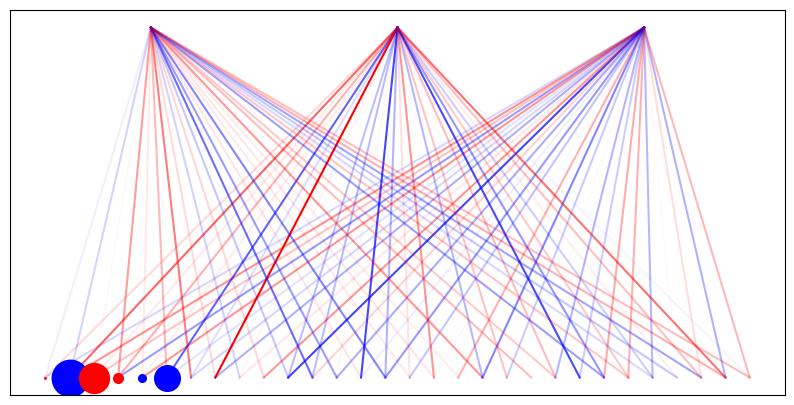

In [7]:
# random seed for reproducibility
np.random.seed(12345)

plotgraph(0)

# learning rate
l_rate = 1.0

# minibatch
mini, m = 500, 0

# train model
print('===================================================')
for epoch in range(100):
    # aggregate normalization of batch statistics and learning rate
    l_rate_m = l_rate / mini
    for k in range(N):
        if m==0:
            # initialize averages in miniblock
            v_data, v_model = np.zeros(L),np.zeros(L)
            h_data, h_model = np.zeros(M),np.zeros(M)
            vh_data,vh_model= np.zeros((L,M)),np.zeros((L,M))

        # positive CD phase: generating h 
        h = activate(v[k],w,b,GAP)
        # negative CD phase: generating fantasy vf
        vf = activate(h,w.T,a,GAP)
        # one more positive CD phase: generating fantasy h from fantasy vf 
        hf = activate(vf,w,b,GAP)

        v_data  += v[k]
        v_model += vf
        h_data  += h
        h_model += hf
        vh_data += np.outer(v[k].T,h)
        vh_model+= np.outer(vf.T,hf)
    
        m += 1
        # minibatch
        if m==mini:
            # gradient of the likelihood: follow it along its positive direction
            # with a "vanilla" SGD
            dw = l_rate_m*(vh_data - vh_model)
            da = l_rate_m*(v_data - v_model)
            db = l_rate_m*(h_data - h_model)
            if epoch<=1 and k<=mini:
                print('----------- epoch =',epoch,'  k=',k,'  m=',m)
                print('dw =',dw)
                print('da =',da)
                print('db =',db)
            # basic step of vanilla gradient descent, from eq.(211)
            w = w + dw
            a = a + da
            b = b + db
            m=0
    
    # randomize the order of input data
    np.random.shuffle(v)
    # decrease the learning rate (here as a power law)
    l_rate = l_rate / (0.01 * l_rate + 1)
    if epoch%10==9:
        plotgraph(epoch+1)
        print('l_rate = ',l_rate)

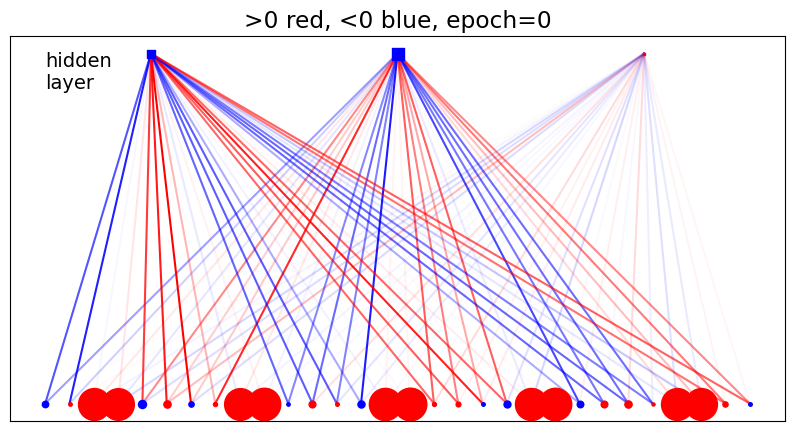

----------- epoch = 0   k= 499   m= 500
dw = [[-0.004 -0.004  0.02 ]
 [ 0.     0.     0.024]
 [-0.048 -0.048 -0.008]
 [-0.048 -0.048 -0.048]
 [-0.036 -0.036  0.004]
 [-0.016 -0.016 -0.032]
 [ 0.012  0.012 -0.068]
 [ 0.028  0.028 -0.06 ]
 [-0.012 -0.012  0.02 ]
 [ 0.04   0.04   0.016]
 [ 0.104  0.104  0.056]
 [ 0.012  0.012  0.036]
 [ 0.024  0.024  0.016]
 [ 0.108  0.108  0.012]
 [ 0.02   0.02   0.004]
 [-0.012 -0.012 -0.012]
 [-0.064 -0.064 -0.12 ]
 [ 0.008  0.008 -0.048]
 [-0.036 -0.036 -0.076]
 [-0.04  -0.04  -0.032]
 [-0.036 -0.036  0.028]
 [-0.024 -0.024  0.   ]
 [ 0.016  0.016  0.04 ]
 [ 0.008  0.008  0.024]
 [-0.008 -0.008  0.04 ]
 [-0.004 -0.004  0.076]
 [ 0.052  0.052 -0.012]
 [-0.04  -0.04  -0.008]
 [ 0.048  0.048  0.   ]
 [ 0.064  0.064 -0.08 ]]
da = [ 0.012  0.     0.008 -0.056 -0.028  0.04   0.02   0.004 -0.004 -0.016
  0.04  -0.036  0.008  0.004  0.004  0.02   0.04  -0.048  0.052 -0.024
 -0.052  0.04   0.056 -0.008  0.008 -0.028  0.004  0.04  -0.024  0.104]
db = [ 0.     0

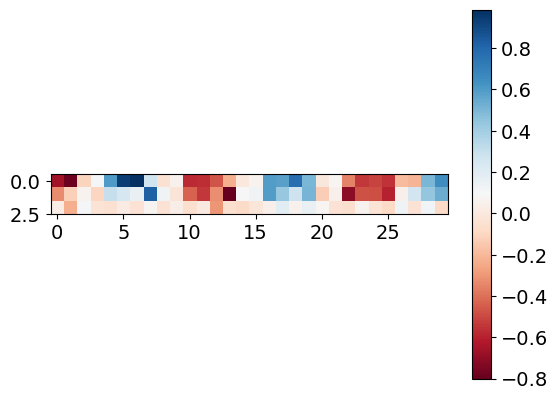

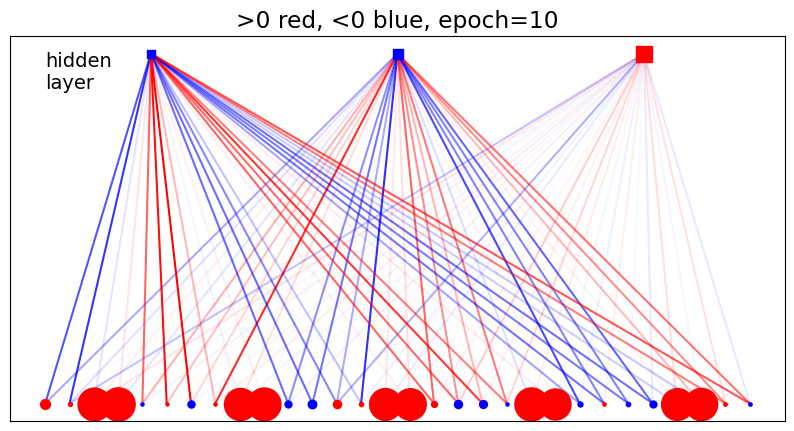

l_rate =  0.9090909090909092


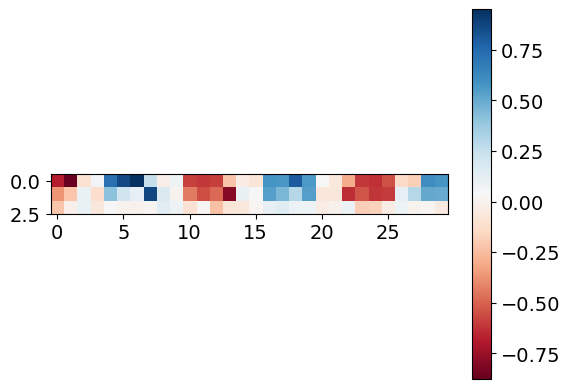

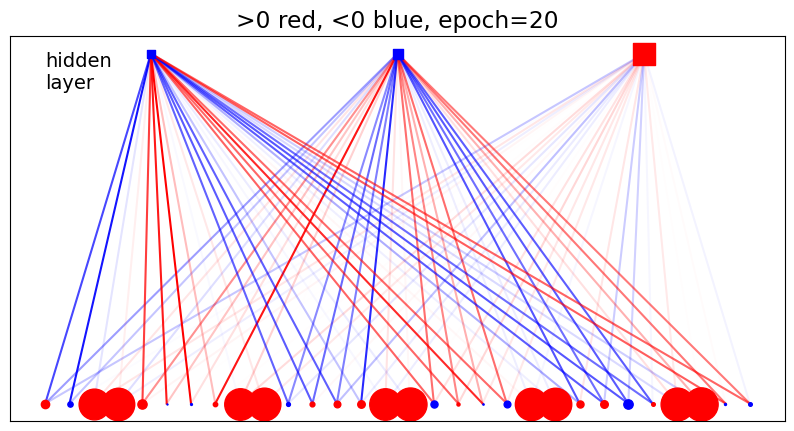

l_rate =  0.8333333333333337


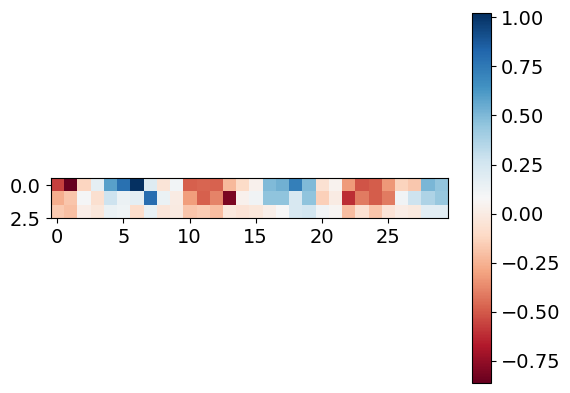

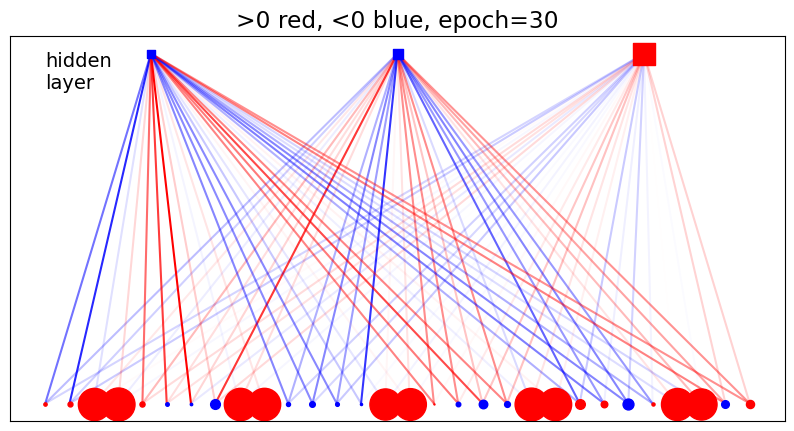

l_rate =  0.7692307692307697


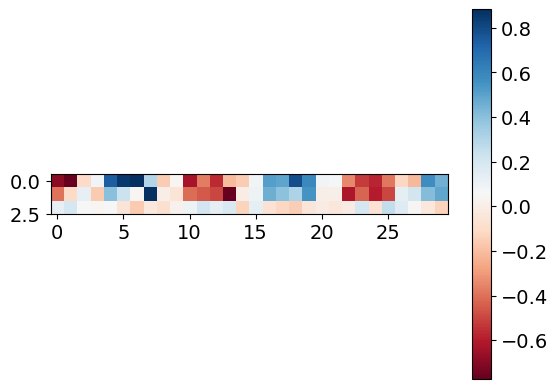

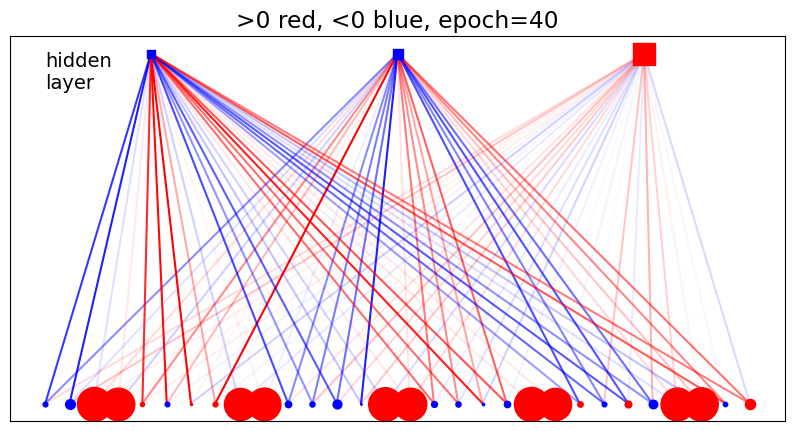

l_rate =  0.7142857142857149


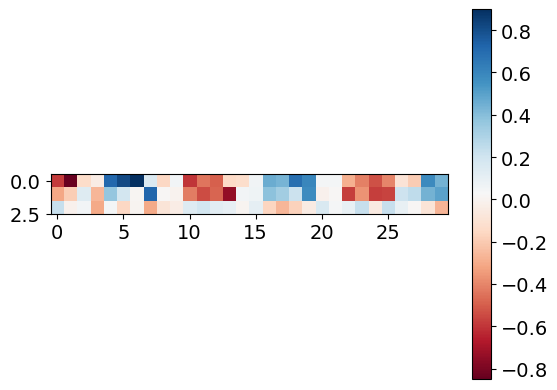

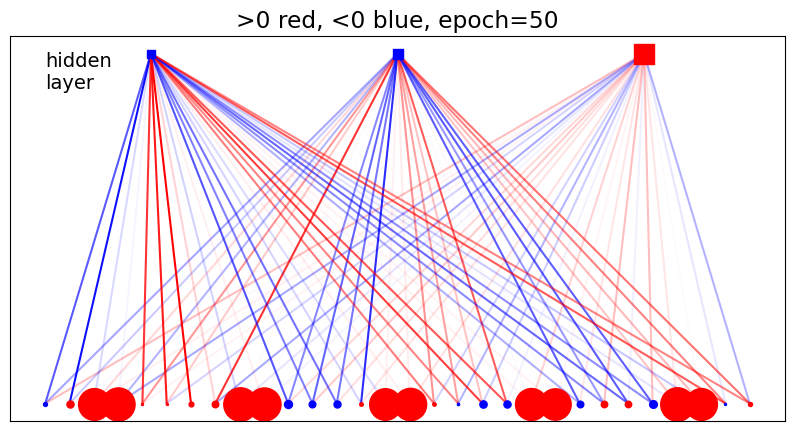

l_rate =  0.6666666666666671


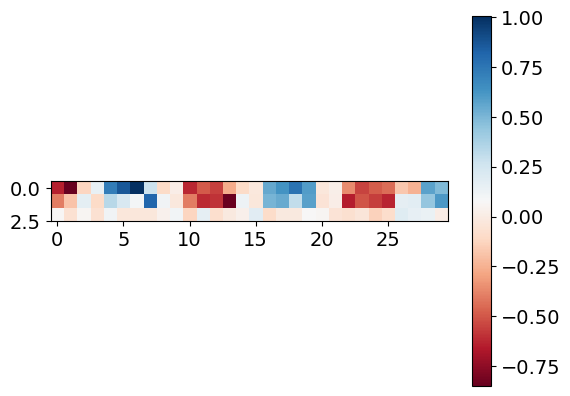

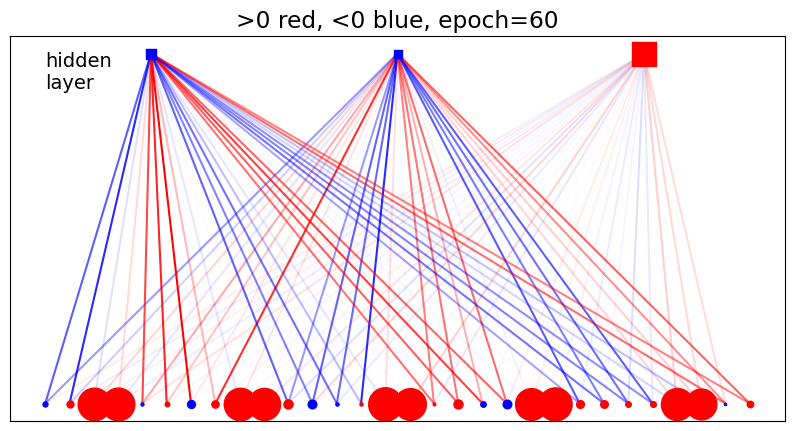

l_rate =  0.6250000000000006


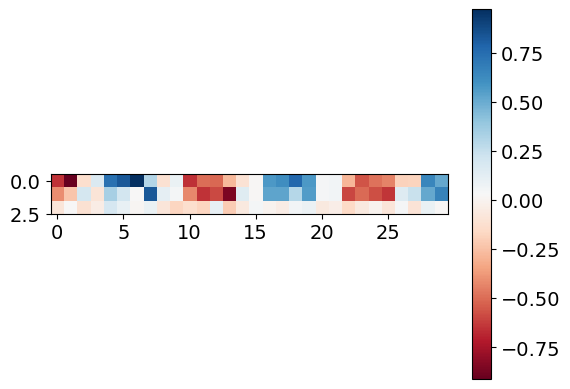

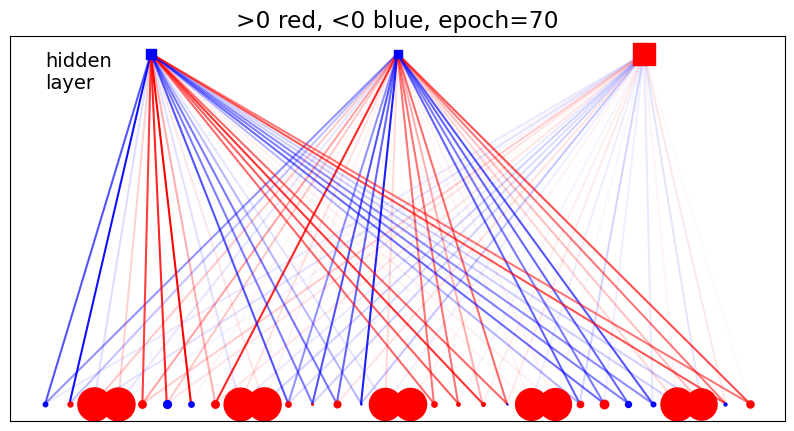

l_rate =  0.5882352941176475


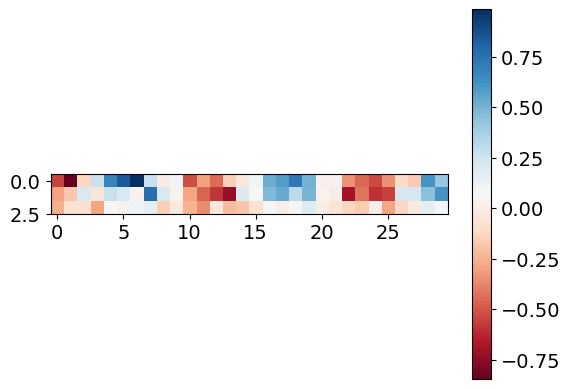

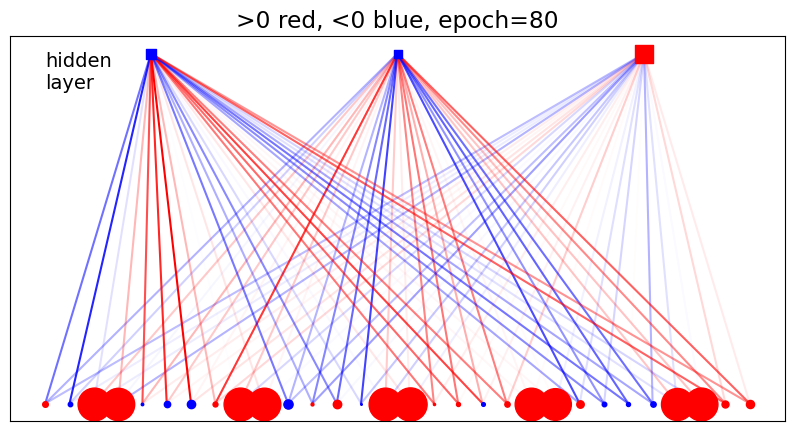

l_rate =  0.555555555555556


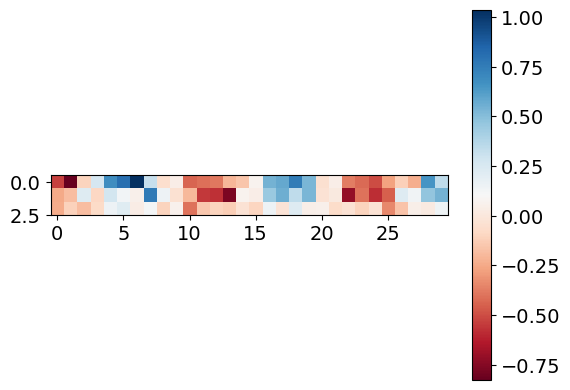

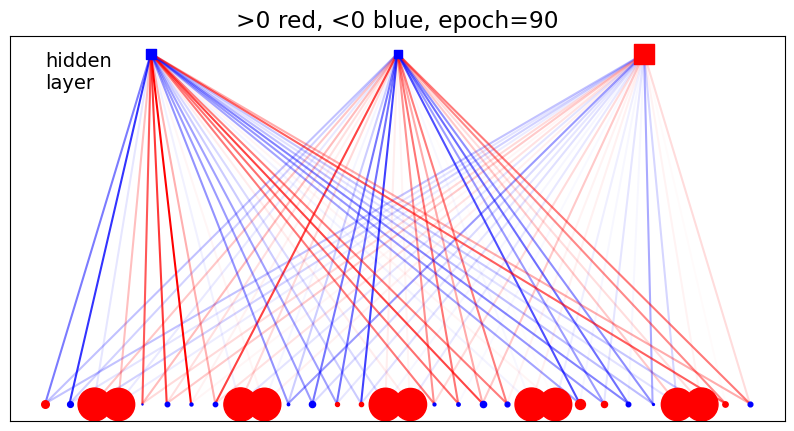

l_rate =  0.5263157894736847


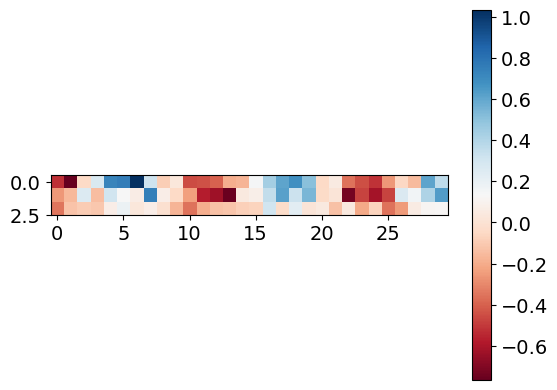

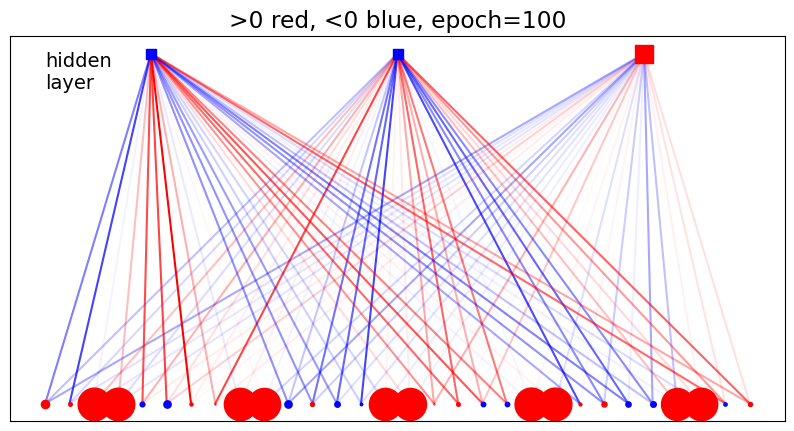

l_rate =  0.5000000000000009


In [50]:
# random seed for reproducibility
np.random.seed(12345)


In [49]:
print('w0=',w0);print('a0=',a0);print('b0=',b0)
print('w=',w);print('a=',a);print('b=',b)

w0= [[-7.12700590e-02  1.66746667e-01 -1.80845348e-01]
 [-1.93480457e-01  6.84396948e-01  4.85121642e-01]
 [ 3.23463708e-02  9.80914197e-02  2.67739292e-01]
 [ 4.33952874e-01  3.50658325e-01 -4.51286265e-01]
 [ 9.57397979e-02  7.96972348e-02  4.71025183e-01]
 [ 3.08615084e-01 -6.96880662e-01 -1.29458954e-01]
 [ 5.81080027e-01 -1.52690383e-01 -1.87913851e-01]
 [ 1.66064865e-01  1.13113708e+00 -3.55545787e-01]
 [-2.00916010e-01  4.32134814e-02  1.05356519e-01]
 [ 1.82354028e-01  3.27362702e-04  4.67854518e-01]
 [-2.48424129e-01 -2.89370520e-01 -8.25208741e-01]
 [-6.47833753e-01 -2.99677261e-01  1.95017559e-01]
 [-4.40741818e-01  4.17184500e-02 -3.70267508e-01]
 [ 1.15894886e-01 -8.21444191e-01 -6.94719399e-02]
 [-5.36853934e-01 -3.37966864e-01 -4.55049525e-01]
 [ 9.96941855e-02  1.31597176e-01 -2.62469602e-01]
 [ 1.15338859e-01  4.69919922e-01  2.43279404e-02]
 [ 8.58809017e-02 -4.12967942e-03  3.49830493e-01]
 [ 4.62069855e-01 -3.20045794e-01 -5.39329635e-01]
 [ 7.72368587e-03  2.640281

Task 5 super plot

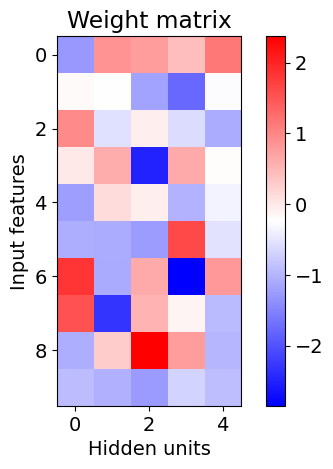

In [52]:
import numpy as np
import matplotlib.pyplot as plt

# create a random matrix of size (10,5)
A = 10 # number of input features
G = 5 # number of hidden units
w = np.random.randn(A,G) # weight matrix

# plot the weight matrix using imshow()
plt.imshow(w, cmap='bwr') # use 'bwr' colormap for blue-red contrast
plt.colorbar() # add a colorbar to show the values
plt.xlabel('Hidden units') # label the x-axis
plt.ylabel('Input features') # label the y-axis
plt.title('Weight matrix') # add a title
plt.show() # show the plot


In [53]:
# Define offset parameters
mu = np.mean(v, axis=0)  # mean of visible variables
lmbda = np.mean(h, axis=0)  # mean of hidden variables

# Define centered variables
vc = v - mu
hc = h - lmbda

# Compute conditional probabilities
p_v_given_h = 1 / (1 + np.exp(-(vc @ W + b)))
p_h_given_v = 1 / (1 + np.exp(-(hc @ W.T + c)))

# Compute gradients
dw = (vc.T @ p_h_given_v - hc.T @ p_v_given_h) / v.shape[0]
db = np.mean(vc, axis=0)
dc = np.mean(hc, axis=0)

# Update parameters
W += lr * dw
b += lr * db
c += lr * dc

NameError: name 'W' is not defined

## Test: noise reduction

In [9]:
from IPython.display import display_html 
import pandas as pd

ampl=40.

# original, non-reshuffled data in v0
v1 = np.zeros_like(v0)
for k in range(N):
    # positive CD phase: generating h 
    h = activate(v0[k],w,b,ampl*GAP)
    # negative CD phase: generating fantasy vf with low T == large GAP
    v1[k] = activate(h,w.T,a,ampl*GAP)
# difference between fantasy and data
diff = (v1 - v0)/2
str0 = fname+'_M'+str(M)+'-mini'+str(mini)
np.savetxt(str0+".fantasy", (v1+1)/2, fmt='%d',delimiter=' ')  
np.savetxt(str0+'.diff', diff, fmt='%d',delimiter=' ')  


def is_one(cell_value):
    color0 = 'background-color: gray; color: white'
    color1 = 'background-color: gold;'
    if type(cell_value) in [float, int]:
        if cell_value == 1:
            return color1
    return color0

N1=12
df0 = pd.DataFrame(v0[:N1])
df1 = pd.DataFrame(((v1[:N1]-vmin)/(1-vmin)).astype(int))

df0s = df0.style.set_table_attributes("style='display:inline'")
df1s = df1.style.set_table_attributes("style='display:inline'")
df0s.applymap(is_one)
df1s.applymap(is_one)
sty = [dict(selector="caption",props=[("font-size", "150%")])]
df0s.set_caption('Original').set_table_styles(sty)
df1s.set_caption('Denoised').set_table_styles(sty)

display_html(df0s._repr_html_()+df1s._repr_html_(), raw=True)

Original 
 
 
   
 0 
 1 
 2 
 3 
 4 
 5 
 6 
 7 
 8 
 9 
 10 
 11 
 12 
 13 
 14 
 15 
 16 
 17 
 18 
 19 
 20 
 21 
 22 
 23 
 24 
 25 
 26 
 27 
 28 
 29 
 
 
 
 
 0 
 0 
 0 
 1 
 1 
 1 
 1 
 1 
 0 
 1 
 1 
 0 
 0 
 0 
 0 
 1 
 0 
 1 
 1 
 1 
 1 
 1 
 1 
 0 
 0 
 0 
 0 
 1 
 1 
 1 
 1 
 
 
 1 
 1 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 0 
 0 
 0 
 0 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 0 
 0 
 
 
 2 
 0 
 0 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 1 
 1 
 1 
 1 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 1 
 1 
 1 
 1 
 
 
 3 
 0 
 0 
 1 
 0 
 1 
 1 
 1 
 0 
 1 
 1 
 0 
 0 
 0 
 0 
 1 
 1 
 1 
 1 
 0 
 1 
 1 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 1 
 1 
 
 
 4 
 1 
 1 
 1 
 1 
 0 
 0 
 0 
 0 
 1 
 1 
 1 
 1 
 0 
 1 
 0 
 1 
 0 
 0 
 1 
 0 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 0 
 0 
 
 
 5 
 0 
 1 
 1 
 1 
 0 
 1 
 1 
 1 
 1 
 1 
 0 
 0 
 0 
 0 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 0 
 0 
 1 
 1 
 1 
 0 
 
 
 6 
 1 
 0 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 1 
 1 
 1 
 0 
 1 
 1 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 1 
 1 
 
 
 7 
 0 
 0 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 0 
 0 
 0 
 0 
 1 
 1 
 0 
 0 
 1 
 1 
 1 
 1 
 0 
 0 
 0 
 0 
 1 
 1 
 1 
 1 
 
 
 8 
 0 
 0 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 0 
 1 
 0 
 0 
 0 
 1 
 1 
 0 
 1 
 1 
 1 
 1 
 0 
 0 
 0 
 0 
 1 
 1 
 1 
 1 
 
 
 9 
 1 
 1 
 1 
 1 
 0 
 0 
 1 
 0 
 1 
 0 
 1 
 1 
 1 
 1 
 1 
 1 
 0 
 0 
 0 
 0 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 0 
 0 
 
 
 10 
 1 
 1 
 1 
 1 
 0 
 1 
 0 
 0 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 0 
 0 
 0 
 0 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 0 
 0 
 
 
 11 
 1 
 1 
 0 
 1 
 1 
 1 
 1 
 0 
 0 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 0 
 0 
 0 
 0 
 1 
 1 
 0 
 1 
 1 
 1 
 1 
 1 
 0 
 0 
 
 
 

 
 Denoised 
 
 
   
 0 
 1 
 2 
 3 
 4 
 5 
 6 
 7 
 8 
 9 
 10 
 11 
 12 
 13 
 14 
 15 
 16 
 17 
 18 
 19 
 20 
 21 
 22 
 23 
 24 
 25 
 26 
 27 
 28 
 29 
 
 
 
 
 0 
 0 
 0 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 0 
 0 
 0 
 0 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 0 
 0 
 0 
 0 
 1 
 1 
 1 
 1 
 
 
 1 
 1 
 1 
 1 
 1 
 0 
 0 
 0 
 0 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 0 
 0 
 0 
 0 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 0 
 0 
 
 
 2 
 0 
 0 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 0 
 0 
 0 
 0 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 0 
 0 
 0 
 0 
 1 
 1 
 1 
 1 
 
 
 3 
 0 
 0 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 0 
 0 
 0 
 0 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 0 
 0 
 0 
 0 
 1 
 1 
 1 
 1 
 
 
 4 
 1 
 1 
 1 
 1 
 0 
 0 
 0 
 0 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 0 
 0 
 0 
 0 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 0 
 0 
 
 
 5 
 0 
 0 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 0 
 0 
 0 
 0 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 0 
 0 
 0 
 0 
 1 
 1 
 1 
 1 
 
 
 6 
 0 
 0 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 0 
 0 
 0 
 0 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 0 
 0 
 0 
 0 
 1 
 1 
 1 
 1 
 
 
 7 
 0 
 0 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 0 
 0 
 0 
 0 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 0 
 0 
 0 
 0 
 1 
 1 
 1 
 1 
 
 
 8 
 0 
 0 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 0 
 0 
 0 
 0 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 0 
 0 
 0 
 0 
 1 
 1 
 1 
 1 
 
 
 9 
 1 
 1 
 1 
 1 
 0 
 0 
 0 
 0 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 0 
 0 
 0 
 0 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 0 
 0 
 
 
 10 
 1 
 1 
 1 
 1 
 0 
 0 
 0 
 0 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 0 
 0 
 0 
 0 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 0 
 0 
 
 
 11 
 1 
 1 
 1 
 1 
 0 
 0 
 0 
 0 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 0 
 0 
 0 
 0 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 0 
 0

## NEW DATA -1 0 1

In [29]:
CASE=0
if CASE==-1: dname="DATA-1"
if CASE==0: dname="DATA"
if CASE==1: dname="DATA1"

fname=dname+'/x_RBM_q10.1.dat'
# loading data: each row is a list of visible units
# NOTE: data "x" here is named "v" for "visible"
v = np.loadtxt(fname, delimiter=" ",dtype=int)
# store in v0, because later we will shuffle v
v0 = np.copy(v)
# to start, take a small subsample
# v = v[1:11]
N = len(v)
L = len(v[1])

SPINS = True
#SPINS = False

if SPINS:
    # sigmoid takes into account energy difference =2
    GAP=2
    # convert 0,1 -> -1,1
    v = 2*v - 1
    vmin=-1
else:
    GAP=1
    vmin=0

print(f'each of N={N} data has L={L} digits')

for i in range(min(12,N)):
    if SPINS: print(v0[i],"\n->",v[i])
    else: print(v[i])
print('...')

each of N=10000 data has L=30 digits
[ 1  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  1  0  0  1  1
 -1  1  0  0  0  0] 
-> [ 1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1 -1 -1  1  1
 -3  1 -1 -1 -1 -1]
[ 1  1  1  1  0  1  1  1  1  1  1  1  1 -1  0  0  1  1  1  1  0  0  1  1
  1  1  0  0  0  0] 
-> [ 1  1  1  1 -1  1  1  1  1  1  1  1  1 -3 -1 -1  1  1  1  1 -1 -1  1  1
  1  1 -1 -1 -1 -1]
[ 1  1  1  1  0  0  0  0  1  1  1  1  1  0  0  0  0  0  1  1  1  1  0 -1
  0  0  1  1  1  1] 
-> [ 1  1  1  1 -1 -1 -1 -1  1  1  1  1  1 -1 -1 -1 -1 -1  1  1  1  1 -1 -3
 -1 -1  1  1  1  1]
[0 0 1 1 1 0 1 1 1 1 0 0 1 1 1 1 0 0 1 1 0 1 0 0 0 0 1 1 1 1] 
-> [-1 -1  1  1  1 -1  1  1  1  1 -1 -1  1  1  1  1 -1 -1  1  1 -1  1 -1 -1
 -1 -1  1  1  1  1]
[0 0 0 0 0 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 1 1 1 1 1 1 0 0 0 0] 
-> [-1 -1 -1 -1 -1 -1  1  1  1  1 -1 -1  1 -1  1  1 -1 -1  1  1  1  1  1  1
  1  1 -1 -1 -1 -1]
[ 1  1  1  1  0  0  1  1  1  0  0  0  0  0  1 -1  1  1  1  1  0  0  0  0
  

In [30]:
# RBM, nr of hidden units
if CASE==-1: M = 6
if CASE==0: M = 3
if CASE==1: M = 6
# range of each initial weight
sigma = sqrt(4. / float(L + M))
# random seed for reproducibility
np.random.seed(12345)
# initial weights from a Normal distr. (see literature, e.g. page 98 of Mehta's review)
w = sigma * np.random.randn(L,M)
a = sigma * np.random.randn(L)
b = np.zeros(M)
print("w=",w);print("a=",a);print("b=",b)
w0,a0,b0=np.copy(w),np.copy(a),np.copy(b)

w= [[-7.12700590e-02  1.66746667e-01 -1.80845348e-01]
 [-1.93480457e-01  6.84396948e-01  4.85121642e-01]
 [ 3.23463708e-02  9.80914197e-02  2.67739292e-01]
 [ 4.33952874e-01  3.50658325e-01 -4.51286265e-01]
 [ 9.57397979e-02  7.96972348e-02  4.71025183e-01]
 [ 3.08615084e-01 -6.96880662e-01 -1.29458954e-01]
 [ 5.81080027e-01 -1.52690383e-01 -1.87913851e-01]
 [ 1.66064865e-01  1.13113708e+00 -3.55545787e-01]
 [-2.00916010e-01  4.32134814e-02  1.05356519e-01]
 [ 1.82354028e-01  3.27362702e-04  4.67854518e-01]
 [-2.48424129e-01 -2.89370520e-01 -8.25208741e-01]
 [-6.47833753e-01 -2.99677261e-01  1.95017559e-01]
 [-4.40741818e-01  4.17184500e-02 -3.70267508e-01]
 [ 1.15894886e-01 -8.21444191e-01 -6.94719399e-02]
 [-5.36853934e-01 -3.37966864e-01 -4.55049525e-01]
 [ 9.96941855e-02  1.31597176e-01 -2.62469602e-01]
 [ 1.15338859e-01  4.69919922e-01  2.43279404e-02]
 [ 8.58809017e-02 -4.12967942e-03  3.49830493e-01]
 [ 4.62069855e-01 -3.20045794e-01 -5.39329635e-01]
 [ 7.72368587e-03  2.6402815

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1]


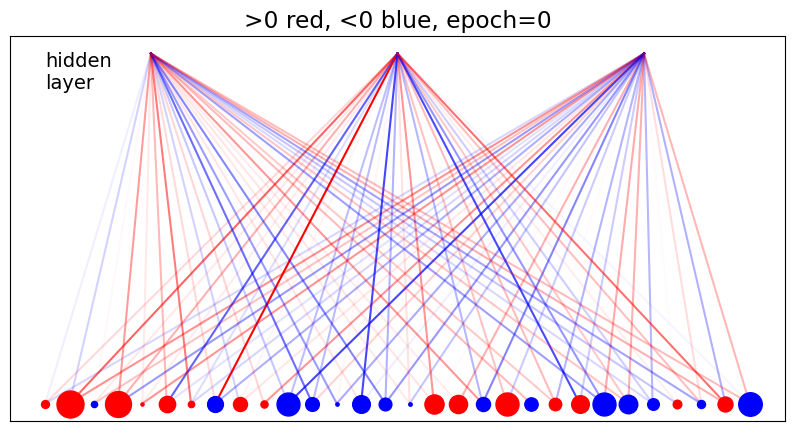

In [31]:
def create_coord(np,x0,f=1.0):
    x=[x0] * np
    print(x)
    y=list(range(np))
    for i in range(np):
        y[i] = f*(y[i]/(np-1.) - 0.5)
    return (x,y)
(x1,y1)=create_coord(L,0)
(x2,y2)=create_coord(M,1,f=0.7)

def mycolor(val):
    if val>0: return 'red'
    elif val<0: return 'blue'
    else: return 'black'

def plotgraph_vert(epoch=0):
    A=2./w.max()
    for i in range(L):
        for j in range(M):
            ex, ey, col = (x1[i],x2[j]),(y1[i],y2[j]),mycolor(w[i][j])
            plt.plot(ex, ey, col, zorder=1, lw=A*abs(w[i][j]))
    # Scatter plot on top of lines
    
    A=300./(a.max()+b.max())
    
    for i in range(L):
        plt.scatter(x1[i], y1[i], s=A*abs(a[i]), zorder=2, c=mycolor(a[i]))

    for j in range(M):
        plt.scatter(x2[j], y2[j], s=A*abs(b[j]), zorder=2, c=mycolor(b[j]), marker="s")
    plt.figaspect(1)
    plt.title(f'>0 red, <0 blue, epoch={epoch}')
    plt.show()
    
def plotgraph(epoch=0):
    fig, ax = plt.subplots(1,1 , figsize=(10, 5))
    ax.tick_params(left=False,bottom=False)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    
    A=1./max(w.max(),-w.min())
    for i in range(L):
        for j in range(M):
            ex, ey, col = (y1[i],y2[j]),(x1[i],x2[j]),mycolor(w[i][j])
            ax.plot(ex, ey, col, zorder=1, alpha=A*abs(w[i][j]))
    # Scatter plot on top of lines
    #A=300./(a.max()+b.max())
    A=500.
    for i in range(L):
        ax.scatter(y1[i],x1[i], s=A*abs(a[i]), zorder=2, c=mycolor(a[i]))
    for j in range(M):
        ax.scatter(y2[j], x2[j], s=min(300,A*abs(b[j])), zorder=2, c=mycolor(b[j]), marker="s")
    ax.set_title(f'>0 red, <0 blue, epoch={epoch}')
    ax.text(-0.5,0.9,"hidden\nlayer")
    plt.show()
                  
plotgraph()

In [33]:
print('w0=',w0);print('a0=',a0);print('b0=',b0)
print('w=',w);print('a=',a);print('b=',b)

w0= [[-7.12700590e-02  1.66746667e-01 -1.80845348e-01]
 [-1.93480457e-01  6.84396948e-01  4.85121642e-01]
 [ 3.23463708e-02  9.80914197e-02  2.67739292e-01]
 [ 4.33952874e-01  3.50658325e-01 -4.51286265e-01]
 [ 9.57397979e-02  7.96972348e-02  4.71025183e-01]
 [ 3.08615084e-01 -6.96880662e-01 -1.29458954e-01]
 [ 5.81080027e-01 -1.52690383e-01 -1.87913851e-01]
 [ 1.66064865e-01  1.13113708e+00 -3.55545787e-01]
 [-2.00916010e-01  4.32134814e-02  1.05356519e-01]
 [ 1.82354028e-01  3.27362702e-04  4.67854518e-01]
 [-2.48424129e-01 -2.89370520e-01 -8.25208741e-01]
 [-6.47833753e-01 -2.99677261e-01  1.95017559e-01]
 [-4.40741818e-01  4.17184500e-02 -3.70267508e-01]
 [ 1.15894886e-01 -8.21444191e-01 -6.94719399e-02]
 [-5.36853934e-01 -3.37966864e-01 -4.55049525e-01]
 [ 9.96941855e-02  1.31597176e-01 -2.62469602e-01]
 [ 1.15338859e-01  4.69919922e-01  2.43279404e-02]
 [ 8.58809017e-02 -4.12967942e-03  3.49830493e-01]
 [ 4.62069855e-01 -3.20045794e-01 -5.39329635e-01]
 [ 7.72368587e-03  2.640281

In [37]:
from IPython.display import display_html 
import pandas as pd

ampl = 40.

# original, non-reshuffled data in v0
v1 = np.zeros_like(v0)
for k in range(N):
    # positive CD phase: generating h 
    h = activate(v0[k],w,b,ampl*GAP)
    # negative CD phase: generating fantasy vf with low T == large GAP
    v1[k] = activate(h,w.T,a,ampl*GAP)

# difference between fantasy and data
diff = (v1 - v0) / 2
str0 = fname+'_M'+str(M)+'-mini'+str(mini)
np.savetxt(str0+".fantasy", (v1+1)/2, fmt='%d',delimiter=' ')  
np.savetxt(str0+'.diff', diff, fmt='%d',delimiter=' ')  


def is_one(cell_value):
    color0 = 'background-color: gray; color: white'
    color1 = 'background-color: gold;'
    color2 = 'background-color: red;'
    if type(cell_value) in [float, int]:
        if cell_value == 1:
            return color1
        if cell_value == -1:
            return color2  
        if cell_value == 0:
            return color0

N1 = 12
df0 = pd.DataFrame(v0[:N1])
df1 = pd.DataFrame(((v1[:N1]-vmin)/(1-vmin)).astype(int))

df0s = df0.style.set_table_attributes("style='display:inline'")
df1s = df1.style.set_table_attributes("style='display:inline'")

# apply the is_one function to each cell in df0s and df1s
df0s.applymap(is_one)
df1s.applymap(is_one)

sty = [dict(selector="caption",props=[("font-size", "150%")])]
df0s.set_caption('Original').set_table_styles(sty)
df1s.set_caption('Denoised').set_table_styles(sty)

display_html(df0s._repr_html_() + df1s._repr_html_(), raw=True)

Original 
 
 
   
 0 
 1 
 2 
 3 
 4 
 5 
 6 
 7 
 8 
 9 
 10 
 11 
 12 
 13 
 14 
 15 
 16 
 17 
 18 
 19 
 20 
 21 
 22 
 23 
 24 
 25 
 26 
 27 
 28 
 29 
 
 
 
 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 0 
 0 
 1 
 1 
 -1 
 1 
 0 
 0 
 0 
 0 
 
 
 1 
 1 
 1 
 1 
 1 
 0 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 -1 
 0 
 0 
 1 
 1 
 1 
 1 
 0 
 0 
 1 
 1 
 1 
 1 
 0 
 0 
 0 
 0 
 
 
 2 
 1 
 1 
 1 
 1 
 0 
 0 
 0 
 0 
 1 
 1 
 1 
 1 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 1 
 1 
 1 
 0 
 -1 
 0 
 0 
 1 
 1 
 1 
 1 
 
 
 3 
 0 
 0 
 1 
 1 
 1 
 0 
 1 
 1 
 1 
 1 
 0 
 0 
 1 
 1 
 1 
 1 
 0 
 0 
 1 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 1 
 1 
 1 
 1 
 
 
 4 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 1 
 1 
 1 
 0 
 0 
 1 
 0 
 1 
 1 
 0 
 0 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 0 
 0 
 0 
 0 
 
 
 5 
 1 
 1 
 1 
 1 
 0 
 0 
 1 
 1 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 -1 
 1 
 1 
 1 
 1 
 0 
 0 
 0 
 0 
 1 
 1 
 1 
 1 
 0 
 0 
 
 
 6 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 1 
 1 
 1 
 0 
 0 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 0 
 0 
 0 
 0 
 1 
 1 
 1 
 1 
 
 
 7 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 1 
 -1 
 1 
 0 
 0 
 1 
 -1 
 1 
 1 
 0 
 0 
 0 
 0 
 1 
 1 
 1 
 1 
 1 
 1 
 0 
 0 
 0 
 0 
 
 
 8 
 0 
 0 
 1 
 1 
 1 
 1 
 0 
 0 
 1 
 1 
 1 
 1 
 0 
 -1 
 1 
 1 
 1 
 1 
 0 
 0 
 1 
 1 
 1 
 1 
 0 
 1 
 -1 
 0 
 0 
 0 
 
 
 9 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 0 
 0 
 0 
 0 
 1 
 1 
 0 
 1 
 0 
 0 
 1 
 0 
 1 
 1 
 1 
 1 
 1 
 1 
 0 
 0 
 0 
 0 
 
 
 10 
 1 
 1 
 1 
 1 
 0 
 0 
 0 
 0 
 1 
 1 
 1 
 1 
 0 
 0 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 0 
 0 
 0 
 0 
 
 
 11 
 0 
 0 
 1 
 1 
 1 
 1 
 0 
 0 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 0 
 0 
 1 
 1 
 1 
 1 
 0 
 0 
 0 
 0 
 1 
 1 
 1 
 1 
 
 
 

 
 Denoised 
 
 
   
 0 
 1 
 2 
 3 
 4 
 5 
 6 
 7 
 8 
 9 
 10 
 11 
 12 
 13 
 14 
 15 
 16 
 17 
 18 
 19 
 20 
 21 
 22 
 23 
 24 
 25 
 26 
 27 
 28 
 29 
 
 
 
 
 0 
 1 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 1 
 0 
 1 
 1 
 1 
 1 
 1 
 0 
 0 
 0 
 1 
 1 
 0 
 0 
 1 
 0 
 0 
 1 
 1 
 0 
 0 
 0 
 
 
 1 
 1 
 1 
 0 
 1 
 0 
 1 
 1 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 
 
 2 
 1 
 1 
 0 
 1 
 0 
 1 
 1 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 
 
 3 
 1 
 1 
 0 
 1 
 0 
 1 
 1 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 
 
 4 
 0 
 0 
 0 
 1 
 0 
 1 
 1 
 0 
 0 
 0 
 1 
 0 
 0 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 
 
 5 
 1 
 1 
 0 
 1 
 0 
 1 
 1 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 
 
 6 
 1 
 1 
 0 
 1 
 0 
 0 
 0 
 1 
 1 
 0 
 1 
 0 
 1 
 0 
 1 
 1 
 1 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 1 
 1 
 1 
 1 
 0 
 
 
 7 
 1 
 1 
 0 
 1 
 0 
 1 
 1 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 
 
 8 
 1 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 1 
 0 
 1 
 1 
 1 
 1 
 1 
 1 
 0 
 0 
 1 
 1 
 0 
 0 
 1 
 1 
 0 
 1 
 1 
 0 
 0 
 0 
 
 
 9 
 0 
 0 
 0 
 1 
 0 
 1 
 1 
 0 
 0 
 0 
 1 
 0 
 0 
 1 
 1 
 1 
 0 
 1 
 1 
 1 
 1 
 1 
 1 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 
 
 10 
 1 
 1 
 0 
 1 
 0 
 0 
 0 
 1 
 1 
 0 
 1 
 0 
 1 
 0 
 1 
 1 
 1 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 1 
 1 
 1 
 1 
 0 
 
 
 11 
 0 
 0 
 0 
 1 
 0 
 1 
 1 
 0 
 0 
 0 
 1 
 0 
 0 
 1 
 1 
 1 
 0 
 1 
 1 
 1 
 1 
 1 
 1 
 0 
 0 
 1 
 0 
 0 
 1 
 0

Adam optimizer

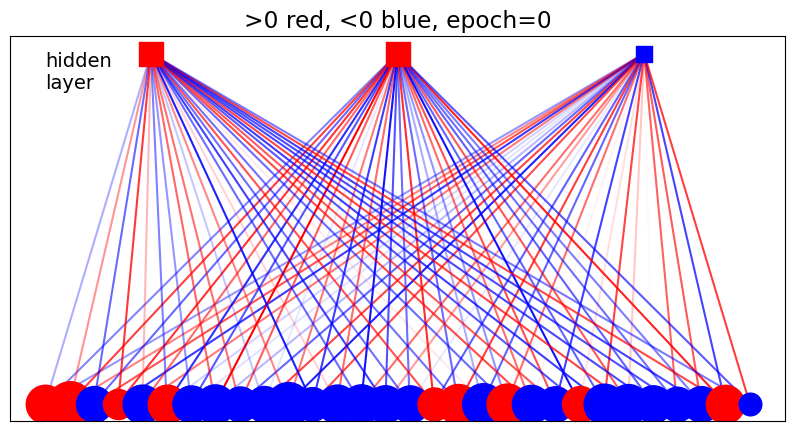

In [39]:
# random seed for reproducibility
np.random.seed(12345)

plotgraph(0)

# learning rate
l_rate = 1.0

# minibatch size
mini = 500

# Adam hyperparameters
beta1 = 0.9
beta2 = 0.999
eps = 1e-8

# initialize moments
mw, ma, mb = np.zeros_like(w), np.zeros_like(a), np.zeros_like(b)
vw, va, vb = np.zeros_like(w), np.zeros_like(a), np.zeros_like(b)

# train model
print('===================================================')
for epoch in range(100):
    # aggregate normalization of batch statistics and learning rate
    l_rate_m = l_rate / mini
    for k in range(N):
        if m == 0:
            # initialize averages in miniblock
            v_data, v_model = np.zeros(L), np.zeros(L)
            h_data, h_model = np.zeros(M), np.zeros(M)
            vh_data, vh_model = np.zeros((L, M)), np.zeros((L, M))

        # positive CD phase: generating h 
        h = activate(v[k], w, b, GAP)
        # negative CD phase: generating fantasy vf
        vf = activate(h, w.T, a, GAP)
        # one more positive CD phase: generating fantasy h from fantasy vf 
        hf = activate(vf, w, b, GAP)

        v_data += v[k]
        v_model += vf
        h_data += h
        h_model += hf
        vh_data += np.outer(v[k].T, h)
        vh_model += np.outer(vf.T, hf)

        m += 1
        # minibatch
        if m == mini:
            # compute gradients
            dw = (vh_data - vh_model) / mini
            da = (v_data - v_model) / mini
            db = (h_data - h_model) / mini

            # compute moments
            mw = beta1 * mw + (1 - beta1) * dw
            ma = beta1 * ma + (1 - beta1) * da
            mb = beta1 * mb + (1 - beta1) * db
            vw = beta2 * vw + (1 - beta2) * (dw ** 2)
            va = beta2 * va + (1 - beta2) * (da ** 2)
            vb = beta2 * vb + (1 - beta2) * (db ** 2)

            # bias-corrected moments
            mwc = mw / (1 - beta1 ** (epoch + 1))
            mac = ma / (1 - beta1 ** (epoch + 1))
            mbc = mb / (1 - beta1 ** (epoch + 1))
            vwc = vw / (1 - beta2 ** (epoch + 1))
            vac = va / (1 - beta2 ** (epoch + 1))
            vbc = vb / (1 - beta2 ** (epoch + 1))

            # update parameters
            w -= l_rate_m * mwc / (np.sqrt(vwc) + eps)
            a -= l_rate_m * mac / (np.sqrt(vac) + eps)
            b -= l_rate_m * mbc / (np.sqrt(vbc) + eps)
            m = 0

    # randomize the order of input data
    np.random.shuffle(v)
   


In [40]:
print('w0=',w0);print('a0=',a0);print('b0=',b0)
print('w=',w);print('a=',a);print('b=',b)

w0= [[-7.12700590e-02  1.66746667e-01 -1.80845348e-01]
 [-1.93480457e-01  6.84396948e-01  4.85121642e-01]
 [ 3.23463708e-02  9.80914197e-02  2.67739292e-01]
 [ 4.33952874e-01  3.50658325e-01 -4.51286265e-01]
 [ 9.57397979e-02  7.96972348e-02  4.71025183e-01]
 [ 3.08615084e-01 -6.96880662e-01 -1.29458954e-01]
 [ 5.81080027e-01 -1.52690383e-01 -1.87913851e-01]
 [ 1.66064865e-01  1.13113708e+00 -3.55545787e-01]
 [-2.00916010e-01  4.32134814e-02  1.05356519e-01]
 [ 1.82354028e-01  3.27362702e-04  4.67854518e-01]
 [-2.48424129e-01 -2.89370520e-01 -8.25208741e-01]
 [-6.47833753e-01 -2.99677261e-01  1.95017559e-01]
 [-4.40741818e-01  4.17184500e-02 -3.70267508e-01]
 [ 1.15894886e-01 -8.21444191e-01 -6.94719399e-02]
 [-5.36853934e-01 -3.37966864e-01 -4.55049525e-01]
 [ 9.96941855e-02  1.31597176e-01 -2.62469602e-01]
 [ 1.15338859e-01  4.69919922e-01  2.43279404e-02]
 [ 8.58809017e-02 -4.12967942e-03  3.49830493e-01]
 [ 4.62069855e-01 -3.20045794e-01 -5.39329635e-01]
 [ 7.72368587e-03  2.640281

 RMSprop gradient descent

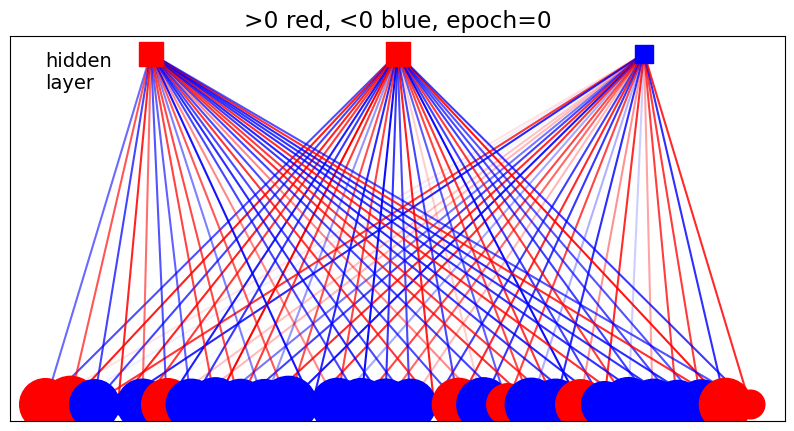

C:\Users\Utente\AppData\Local\Temp\ipykernel_23828\3984710747.py:6: RuntimeWarning: overflow encountered in exp
  prob = 1. / (1. + exp(-DE*act))


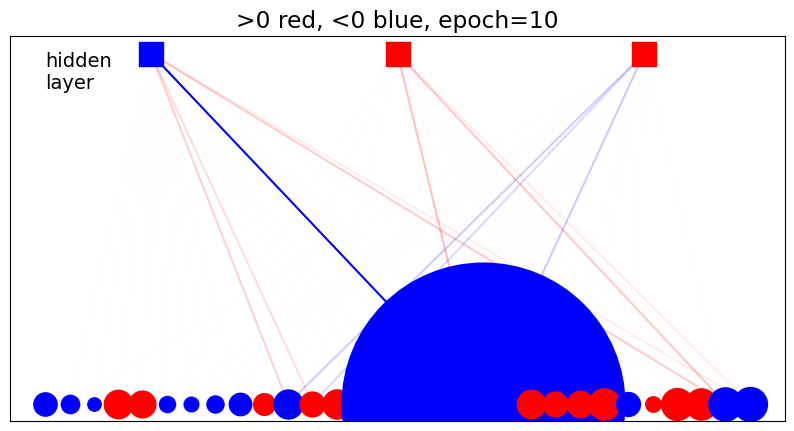

l_rate =  0.09900990099009903


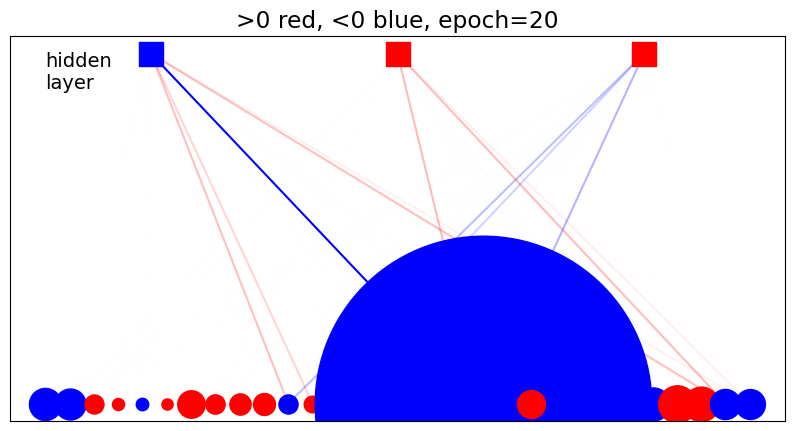

l_rate =  0.09803921568627452


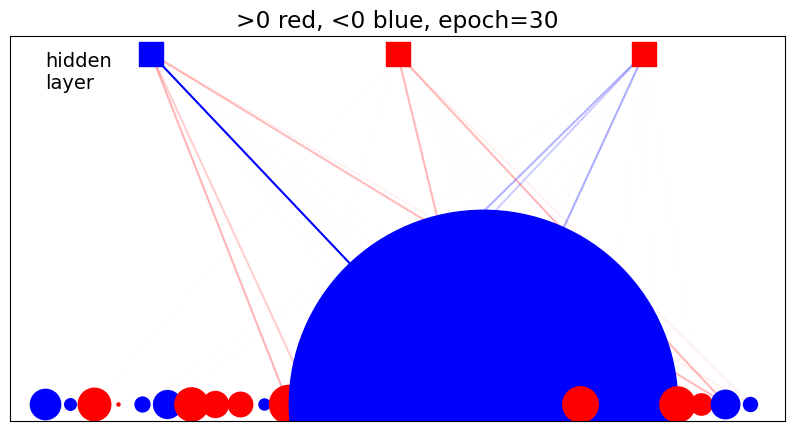

l_rate =  0.09708737864077671


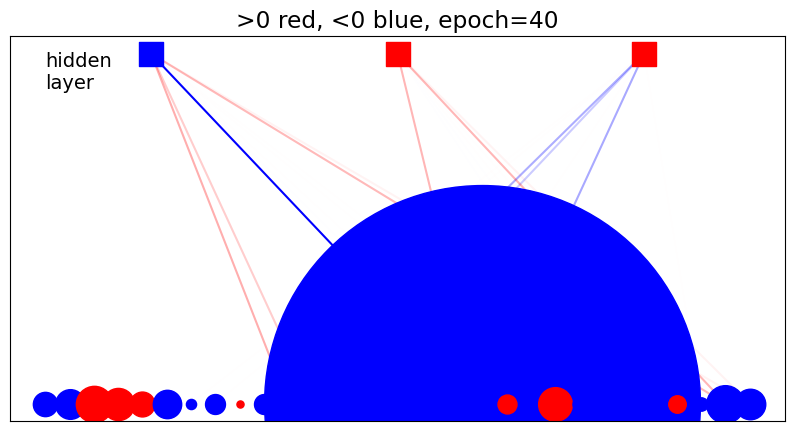

l_rate =  0.09615384615384616


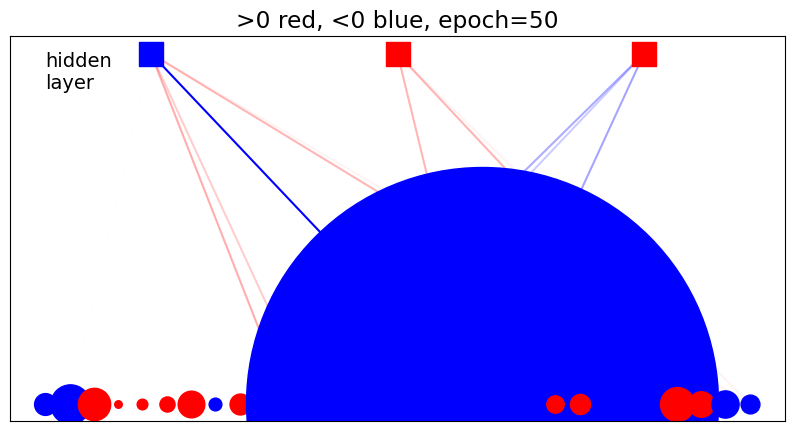

l_rate =  0.09523809523809529


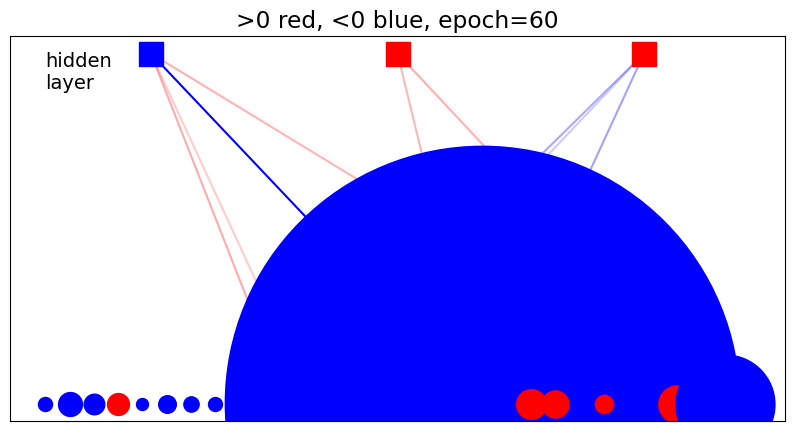

l_rate =  0.09433962264150947


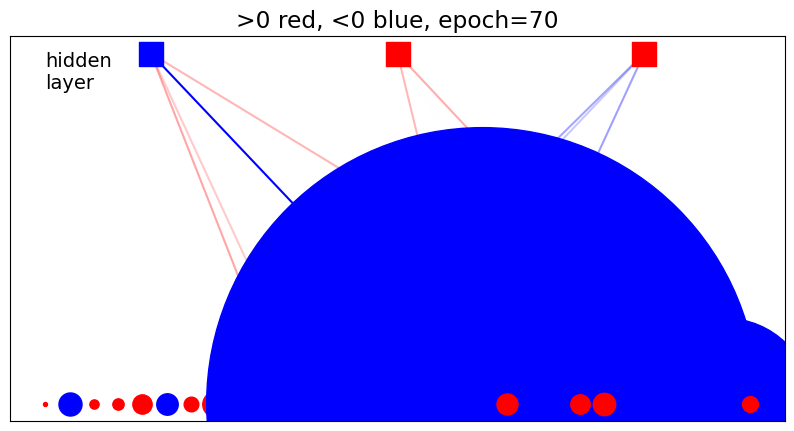

l_rate =  0.0934579439252337


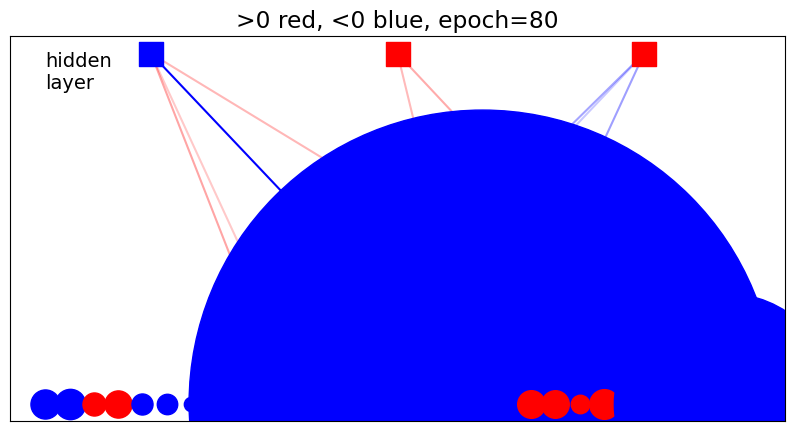

l_rate =  0.09259259259259266


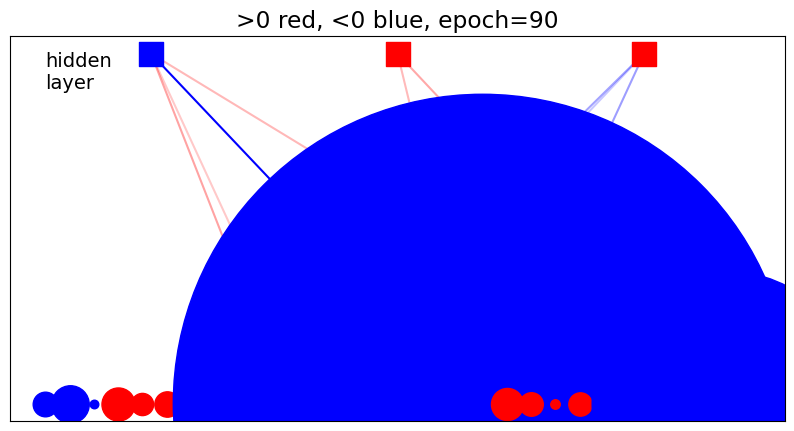

l_rate =  0.0917431192660551


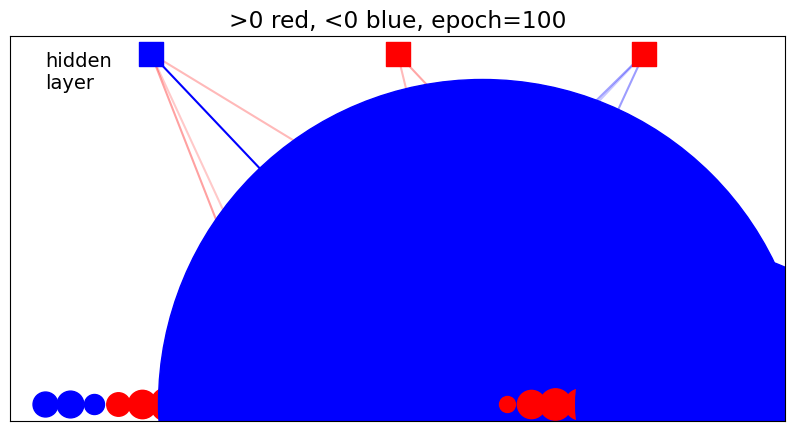

l_rate =  0.09090909090909095


In [42]:
# random seed for reproducibility
np.random.seed(12345)

plotgraph(0)

# learning rate and RMSprop hyperparameters
l_rate = 0.1
eps = 1e-8
rho = 0.9
cache_w, cache_a, cache_b = np.zeros_like(w), np.zeros_like(a), np.zeros_like(b)

# minibatch
mini, m = 500, 0

# train model
print('===================================================')
for epoch in range(100):
    # aggregate normalization of batch statistics and learning rate
    l_rate_m = l_rate / mini
    for k in range(N):
        if m==0:
            # initialize averages in miniblock
            v_data, v_model = np.zeros(L),np.zeros(L)
            h_data, h_model = np.zeros(M),np.zeros(M)
            vh_data,vh_model= np.zeros((L,M)),np.zeros((L,M))

        # positive CD phase: generating h 
        h = activate(v[k],w,b,GAP)
        # negative CD phase: generating fantasy vf
        vf = activate(h,w.T,a,GAP)
        # one more positive CD phase: generating fantasy h from fantasy vf 
        hf = activate(vf,w,b,GAP)

        v_data  += v[k]
        v_model += vf
        h_data  += h
        h_model += hf
        vh_data += np.outer(v[k].T,h)
        vh_model+= np.outer(vf.T,hf)
    
        m += 1
        # minibatch
        if m==mini:
            # gradient of the likelihood: follow it along its positive direction
            # with RMSprop gradient descent
            dw = l_rate_m*(vh_data - vh_model)
            da = l_rate_m*(v_data - v_model)
            db = l_rate_m*(h_data - h_model)
            # update RMSprop caches
            cache_w = rho * cache_w + (1 - rho) * dw**2
            cache_a = rho * cache_a + (1 - rho) * da**2
            cache_b = rho * cache_b + (1 - rho) * db**2
            # basic step of RMSprop gradient descent, from eq.(236)
            w = w + dw / (np.sqrt(cache_w) + eps)
            a = a + da / (np.sqrt(cache_a) + eps)
            b = b + db / (np.sqrt(cache_b) + eps)
            m=0
    
    # randomize the order of input data
    np.random.shuffle(v)
    # decrease the learning rate (here as a power law)
    l_rate = l_rate / (0.01 * l_rate + 1)
    if epoch%10==9:
        plotgraph(epoch+1)
        print('l_rate = ',l_rate)


In [43]:
print('w0=',w0);print('a0=',a0);print('b0=',b0)
print('w=',w);print('a=',a);print('b=',b)

w0= [[-7.12700590e-02  1.66746667e-01 -1.80845348e-01]
 [-1.93480457e-01  6.84396948e-01  4.85121642e-01]
 [ 3.23463708e-02  9.80914197e-02  2.67739292e-01]
 [ 4.33952874e-01  3.50658325e-01 -4.51286265e-01]
 [ 9.57397979e-02  7.96972348e-02  4.71025183e-01]
 [ 3.08615084e-01 -6.96880662e-01 -1.29458954e-01]
 [ 5.81080027e-01 -1.52690383e-01 -1.87913851e-01]
 [ 1.66064865e-01  1.13113708e+00 -3.55545787e-01]
 [-2.00916010e-01  4.32134814e-02  1.05356519e-01]
 [ 1.82354028e-01  3.27362702e-04  4.67854518e-01]
 [-2.48424129e-01 -2.89370520e-01 -8.25208741e-01]
 [-6.47833753e-01 -2.99677261e-01  1.95017559e-01]
 [-4.40741818e-01  4.17184500e-02 -3.70267508e-01]
 [ 1.15894886e-01 -8.21444191e-01 -6.94719399e-02]
 [-5.36853934e-01 -3.37966864e-01 -4.55049525e-01]
 [ 9.96941855e-02  1.31597176e-01 -2.62469602e-01]
 [ 1.15338859e-01  4.69919922e-01  2.43279404e-02]
 [ 8.58809017e-02 -4.12967942e-03  3.49830493e-01]
 [ 4.62069855e-01 -3.20045794e-01 -5.39329635e-01]
 [ 7.72368587e-03  2.640281

Plot 5